# Visualization of Cognitive Load test
## Data load

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# initial path
path = 'pilot'

# load data from CSV file for all persons
def load_data(path, person_id):
    df = pd.DataFrame()

    if os.path.isfile(path):
        df = pd.read_csv(path)
        df['person_id'] = int(person_id)

    return df

# set initial DataFrame object
baseline_empatica_bvp \
    = cognitive_load_empatica_bvp \
    = baseline_empatica_temp \
    = cognitive_load_empatica_temp \
    = baseline_muse_eeg \
    = cognitive_load_muse_eeg \
    = cognitive_load_stroop_responses = pd.DataFrame()

# load person data based on ID from the directory structure
for person_id in os.listdir(path):
    print(f"Loading person {person_id}")

    df = load_data(f"{path}/{person_id}/baseline/empatica_bvp.csv", person_id)
    baseline_empatica_bvp = pd.concat([df, baseline_empatica_bvp])

    df = load_data(f"{path}/{person_id}/cognitive_load/empatica_bvp.csv", person_id)
    cognitive_load_empatica_bvp = pd.concat([df, cognitive_load_empatica_bvp])

    df = load_data(f"{path}/{person_id}/baseline/empatica_temp.csv", person_id)
    baseline_empatica_temp = pd.concat([df, baseline_empatica_temp])

    df = load_data(f"{path}/{person_id}/cognitive_load/empatica_temp.csv", person_id)
    cognitive_load_empatica_temp = pd.concat([df, cognitive_load_empatica_temp])

    df = load_data(f"{path}/{person_id}/baseline/muse_eeg.csv", person_id)
    baseline_muse_eeg = pd.concat([df, baseline_muse_eeg])

    df = load_data(f"{path}/{person_id}/cognitive_load/muse_eeg.csv", person_id)
    cognitive_load_muse_eeg = pd.concat([df, cognitive_load_muse_eeg])

    df = load_data(f"{path}/{person_id}/cognitive_load/stroop_responses.csv", person_id)
    cognitive_load_stroop_responses = pd.concat([df, cognitive_load_stroop_responses])


Loading person 9
Loading person 0
Loading person 7
Loading person 6
Loading person 1


/var/folders/hx/cxfs9y0j2kd5xt0tx6v2gmh80000gn/T/ipykernel_27578/2497017761.py:15: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Loading person 10
Loading person 8
Loading person 4
Loading person 3
Loading person 2
Loading person 5


## Basic display of dataFrames

In [601]:
# check the dimensions of the dataframe
baseline_empatica_bvp.shape

(104427, 3)

In [593]:
# display Blood Volume Pulse (BVP) data retrieved from Empatica E4 wristband during rest time
baseline_empatica_bvp.head()

bvp          time  person_id
0  16.92  1.660302e+09          5
1  22.55  1.660302e+09          5
2  28.20  1.660302e+09          5
3  33.26  1.660302e+09          5
4  37.36  1.660302e+09          5

In [599]:
# display Blood Volume Pulse (BVP) data retrieved from Empatica E4 wristband during cognitive test time
cognitive_load_empatica_bvp.head()

bvp          time  person_id
0  -8.42  1.660301e+09          5
1 -10.72  1.660301e+09          5
2 -12.88  1.660301e+09          5
3 -14.98  1.660301e+09          5
4 -16.82  1.660301e+09          5

In [602]:
# check the dimensions of the dataframe
baseline_empatica_temp.shape

(6523, 3)

In [594]:
# display temperature data retrieved from Empatica E4 wristband during rest time
baseline_empatica_temp.head()

temp          time  person_id
0  31.43  1.660302e+09          5
1  31.43  1.660302e+09          5
2  31.43  1.660302e+09          5
3  31.43  1.660302e+09          5
4  31.43  1.660302e+09          5

In [743]:
basic_stats_bt = baseline_empatica_temp['temp'].describe().loc[['mean', '50%', 'std']]
basic_stats_bt

mean    33.410382
50%     33.870000
std      1.150528
Name: temp, dtype: float64

In [596]:
# display temperature data retrieved from Empatica E4 wristband during cognitive time
cognitive_load_empatica_temp.head()

temp          time  person_id
0  32.39  1.660301e+09          5
1  32.39  1.660301e+09          5
2  32.39  1.660301e+09          5
3  32.39  1.660301e+09          5
4  32.41  1.660301e+09          5

In [742]:
basic_stats_ct = cognitive_load_empatica_temp['temp'].describe().loc[['mean', '50%', 'std']]
basic_stats_ct

mean    33.732637
50%     34.450000
std      1.364094
Name: temp, dtype: float64

### Conclusion

In [749]:
print("Median temperature during rest time was " + str(basic_stats_bt['50%']) + "°C comparing to " + str(basic_stats_ct['50%']) + "°C during cognitive load time.")

Median temperature during rest time was 33.87°C comparing to 34.45°C during cognitive load time.


In [603]:
# check the dimensions of the dataframe
baseline_muse_eeg.shape

(390665, 41)

In [597]:
# display EEG data retrieved from Muse 2 headband during rest time
baseline_muse_eeg.head()

Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  \
0   0.802986  -0.026848  -0.005025    0.670395   0.208043  -0.038728   
1   0.802986  -0.026848  -0.005025    0.670395   0.208043  -0.038728   
2   0.802986  -0.026848  -0.005025    0.670395   0.208043  -0.038728   
3   0.802986  -0.026848  -0.005025    0.670395   0.208043  -0.038728   
4   0.802986  -0.026848  -0.005025    0.670395   0.208043  -0.038728   

   Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF7  ...    Gyro_Z  HeadBandOn  \
0   -0.34863     0.32299   0.612772   0.184219  ...  2.474823         1.0   
1   -0.34863     0.32299   0.612772   0.184219  ...  2.474823         1.0   
2   -0.34863     0.32299   0.612772   0.184219  ...  2.474823         1.0   
3   -0.34863     0.32299   0.612772   0.184219  ...  2.474823         1.0   
4   -0.34863     0.32299   0.612772   0.184219  ...  2.474823         1.0   

   HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10  Battery  Elements          time  \
0      1.0      1.0      1.0       1.0     90.0       NaN  1.660302e+09   
1      1.0      1.0      1.0       1.0     90.0       NaN  1.660302e+09   
2      1.0      1.0      1.0       1.0     90.0       NaN  1.660302e+09   
3      1.0      1.0      1.0       1.0     90.0       NaN  1.660302e+09   
4      1.0      1.0      1.0       1.0     90.0       NaN  1.660302e+09   

   person_id  
0          5  
1          5  
2          5  
3          5  
4          5  

[5 rows x 41 columns]

In [604]:
# check the dimensions of the dataframe
cognitive_load_muse_eeg.shape

(683551, 41)

In [607]:
# display EEG data retrieved from Muse 2 headband during cognitive test time
cognitive_load_muse_eeg.head()

Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  \
0   0.127181   1.153493   0.409724    0.952068   0.174227     0.2251   
1   0.127181   1.153493   0.411596    0.952068   0.174227     0.2251   
2   0.127181   1.153493   0.411596    0.952068   0.174227     0.2251   
3   0.127181   1.153493   0.411596    0.952068   0.174227     0.2251   
4   0.127181   1.153493   0.411596    0.952068   0.174227     0.2251   

   Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF7  ...    Gyro_Z  HeadBandOn  \
0   0.464619    1.031605   0.530631   0.362782  ...  3.080444         1.0   
1   0.496758    1.031605   0.530631   0.362782  ...  3.080444         1.0   
2   0.496758    1.031605   0.530631   0.362782  ...  3.080444         1.0   
3   0.496758    1.031605   0.530631   0.362782  ...  3.080444         1.0   
4   0.496758    1.031605   0.530631   0.362782  ...  3.080444         1.0   

   HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10  Battery  Elements          time  \
0      1.0      1.0      1.0       1.0    100.0       NaN  1.660301e+09   
1      1.0      1.0      1.0       1.0    100.0       NaN  1.660301e+09   
2      1.0      1.0      1.0       1.0    100.0       NaN  1.660301e+09   
3      1.0      1.0      1.0       1.0    100.0       NaN  1.660301e+09   
4      1.0      1.0      1.0       1.0    100.0       NaN  1.660301e+09   

   person_id  
0          5  
1          5  
2          5  
3          5  
4          5  

[5 rows x 41 columns]

## Plots illustrating BVP change in time during rest and cognitive load time

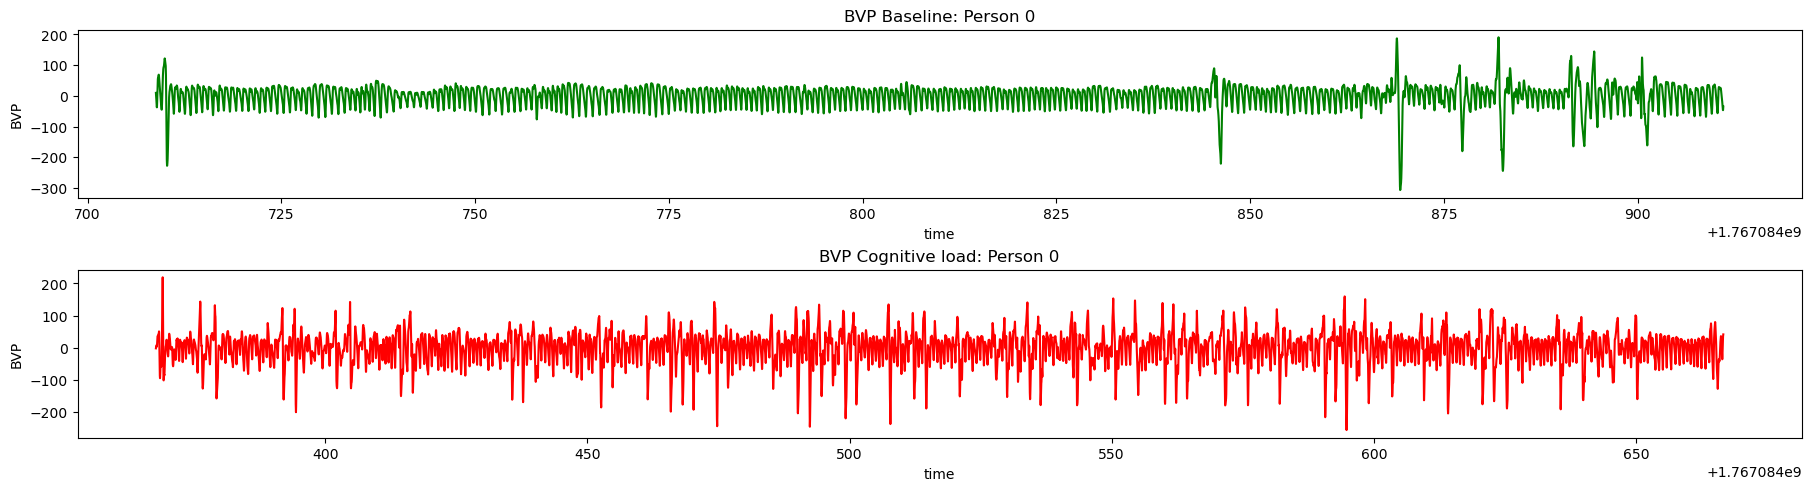

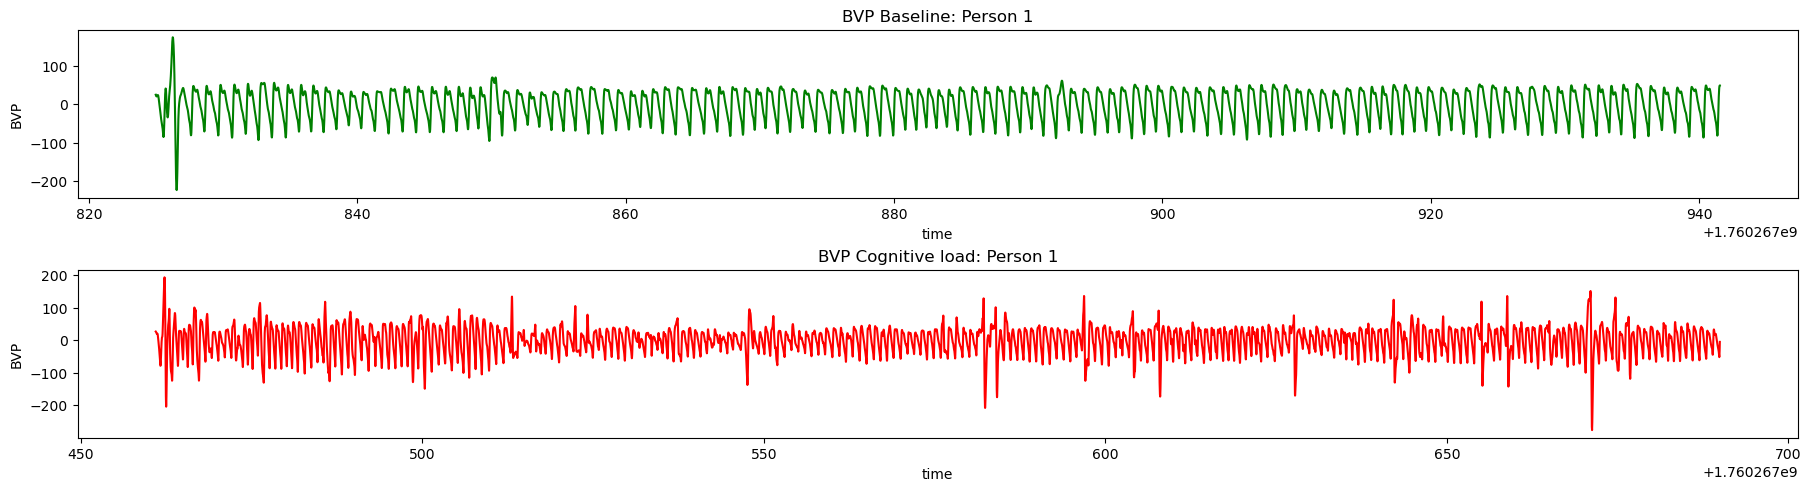

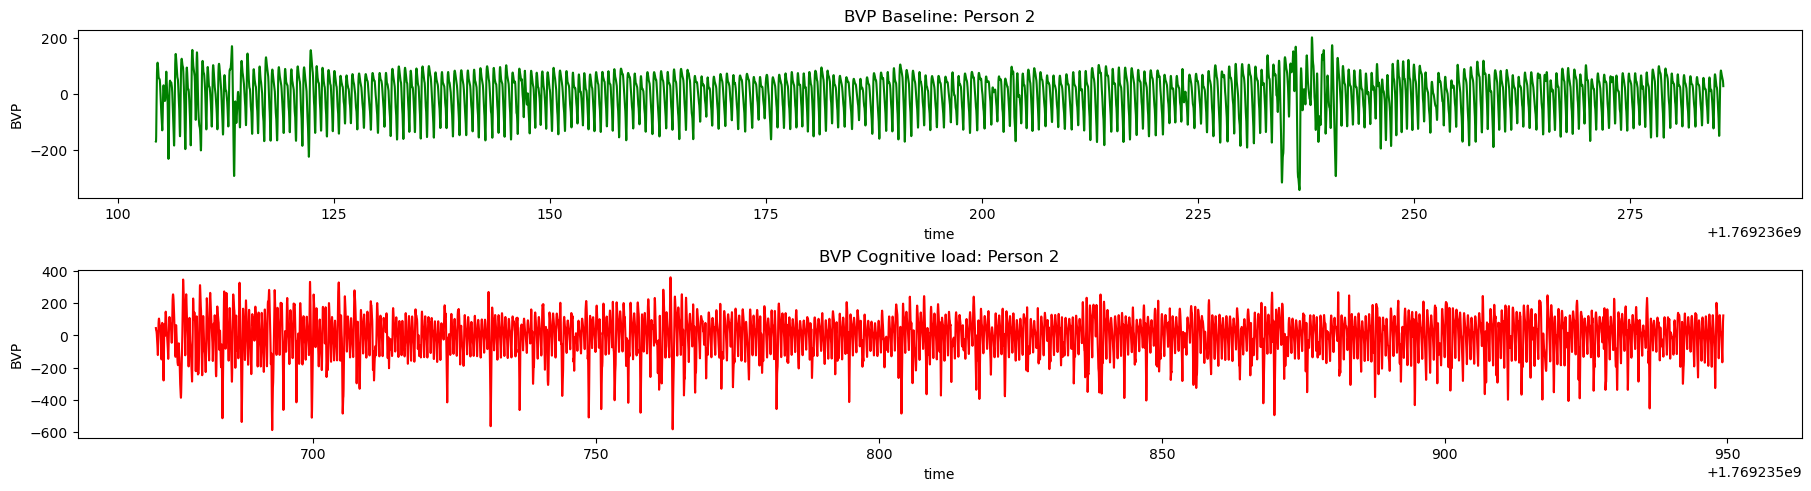

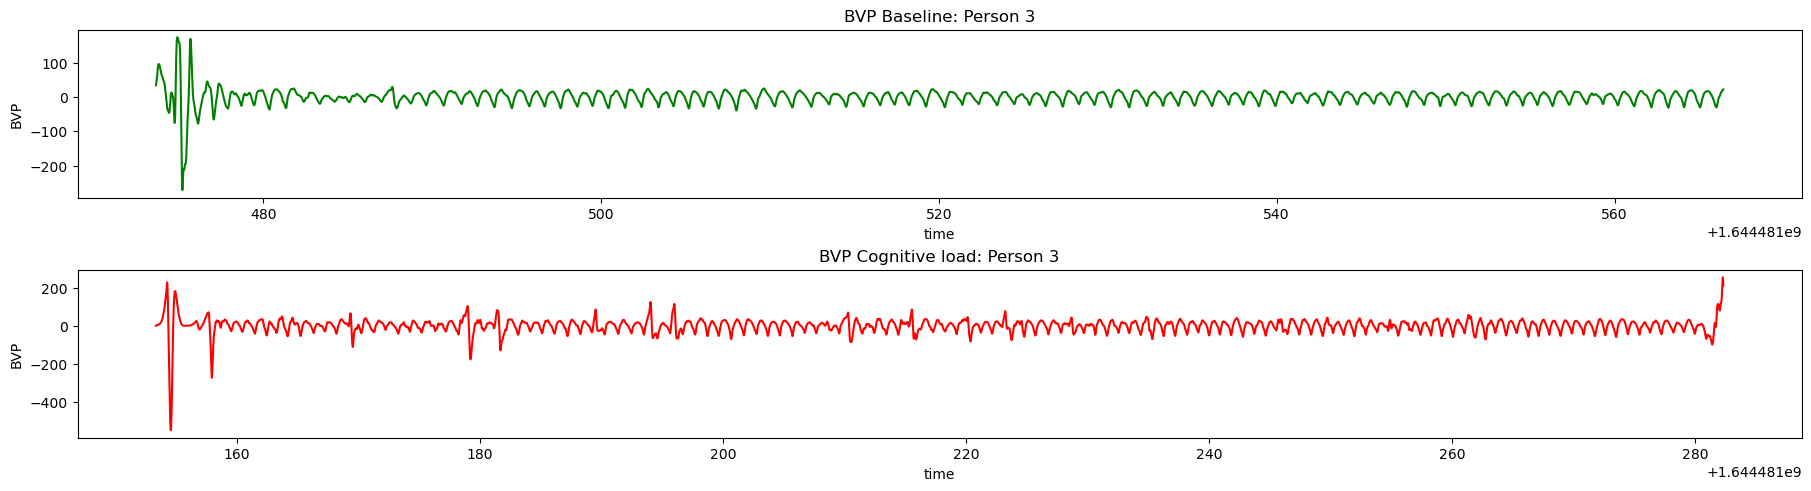

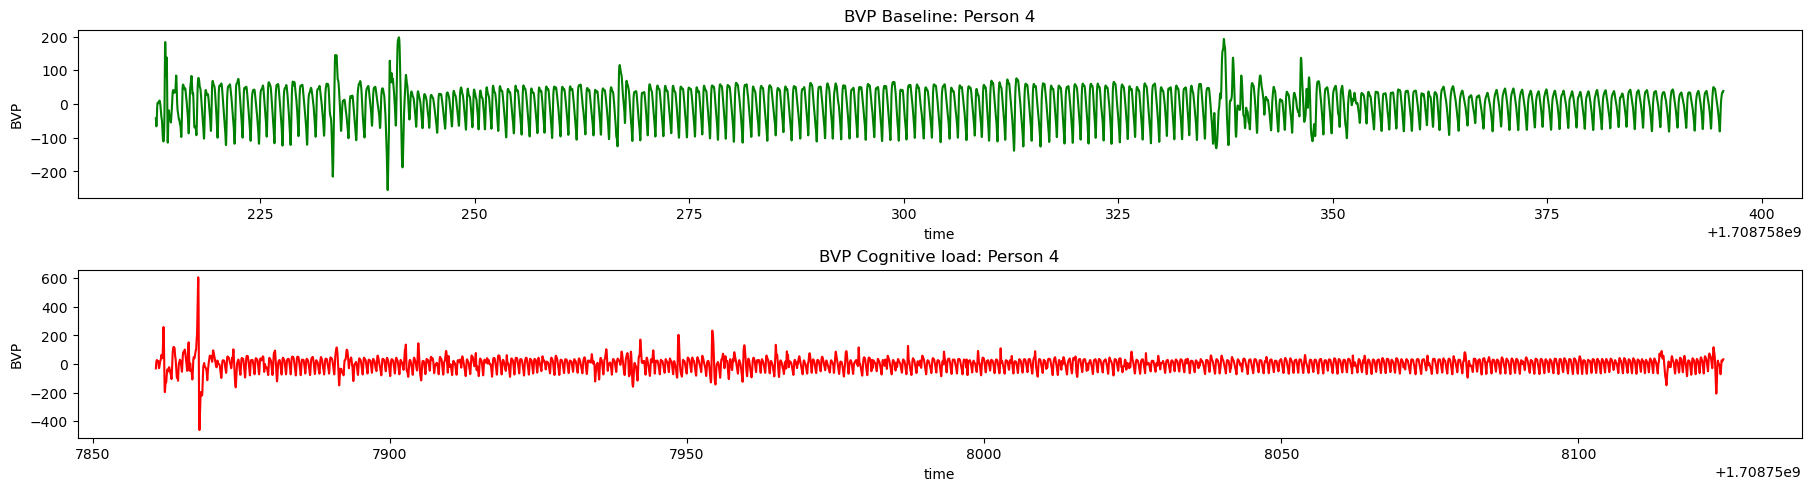

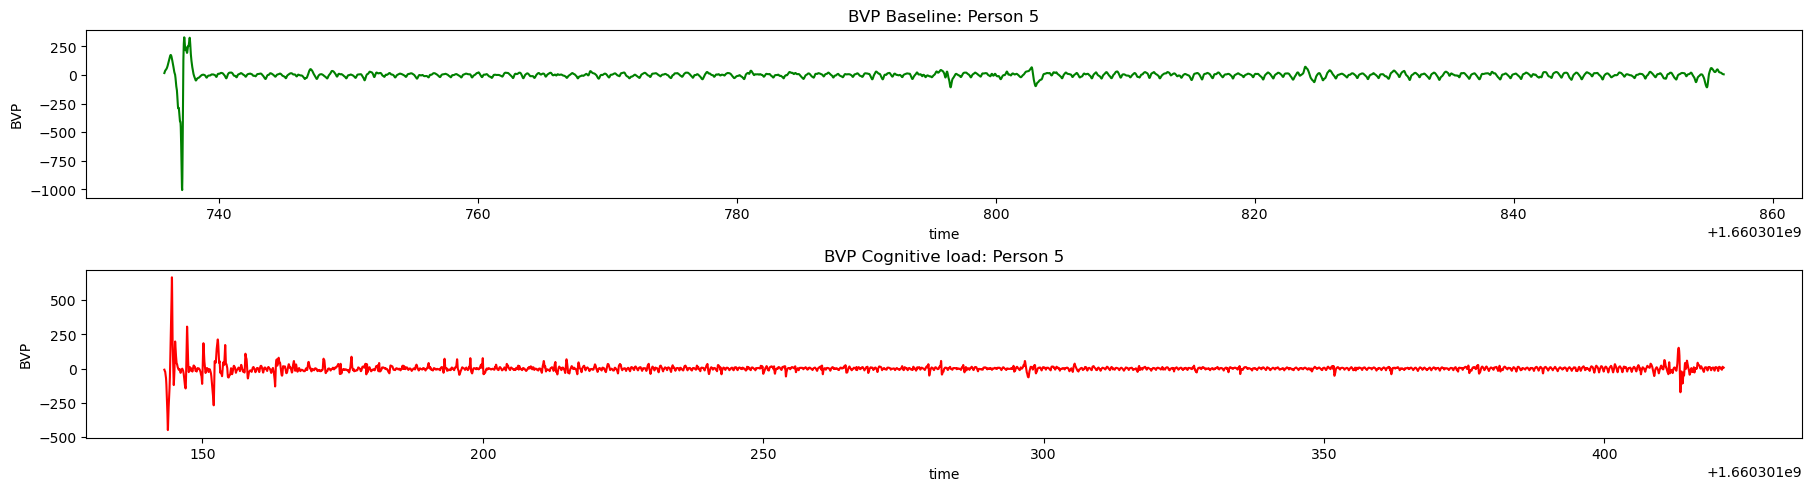

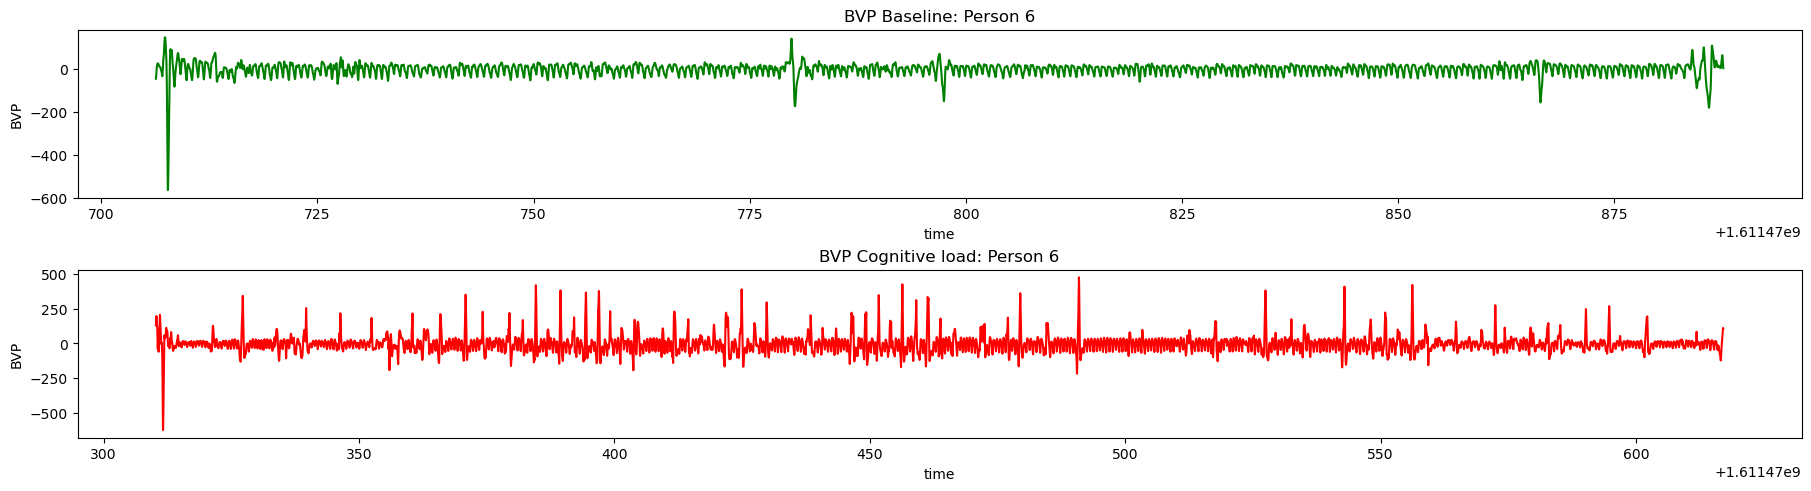

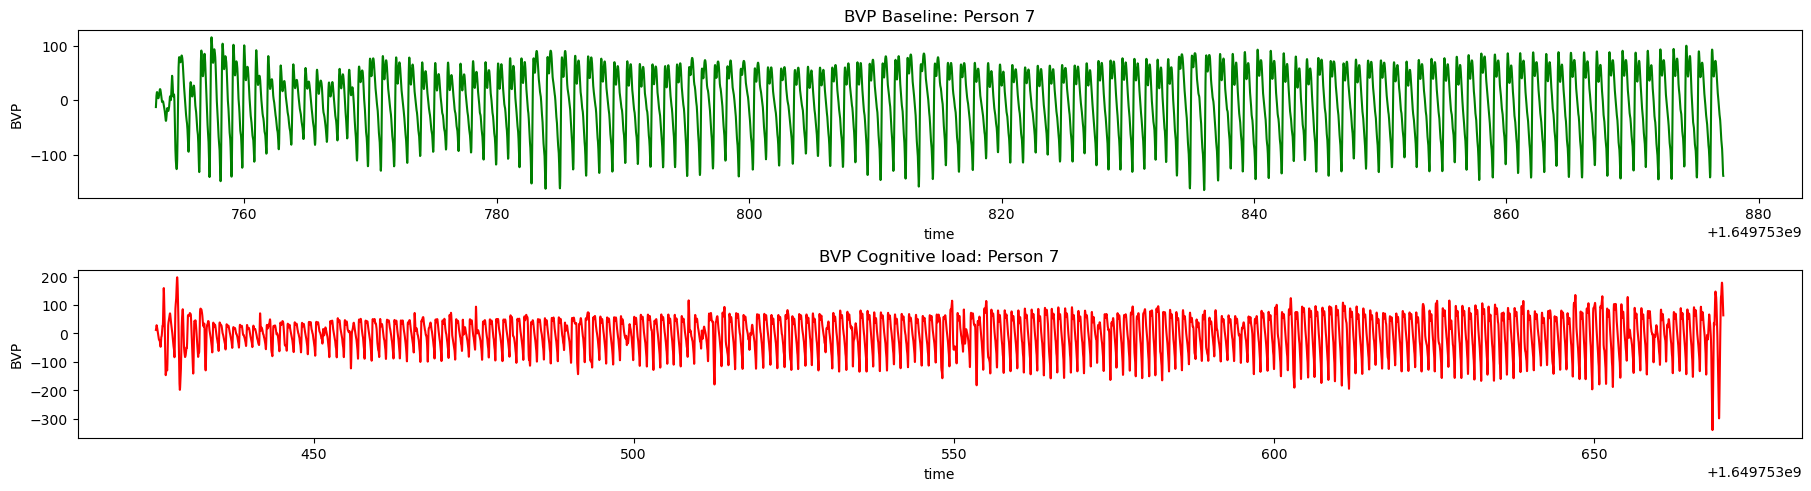

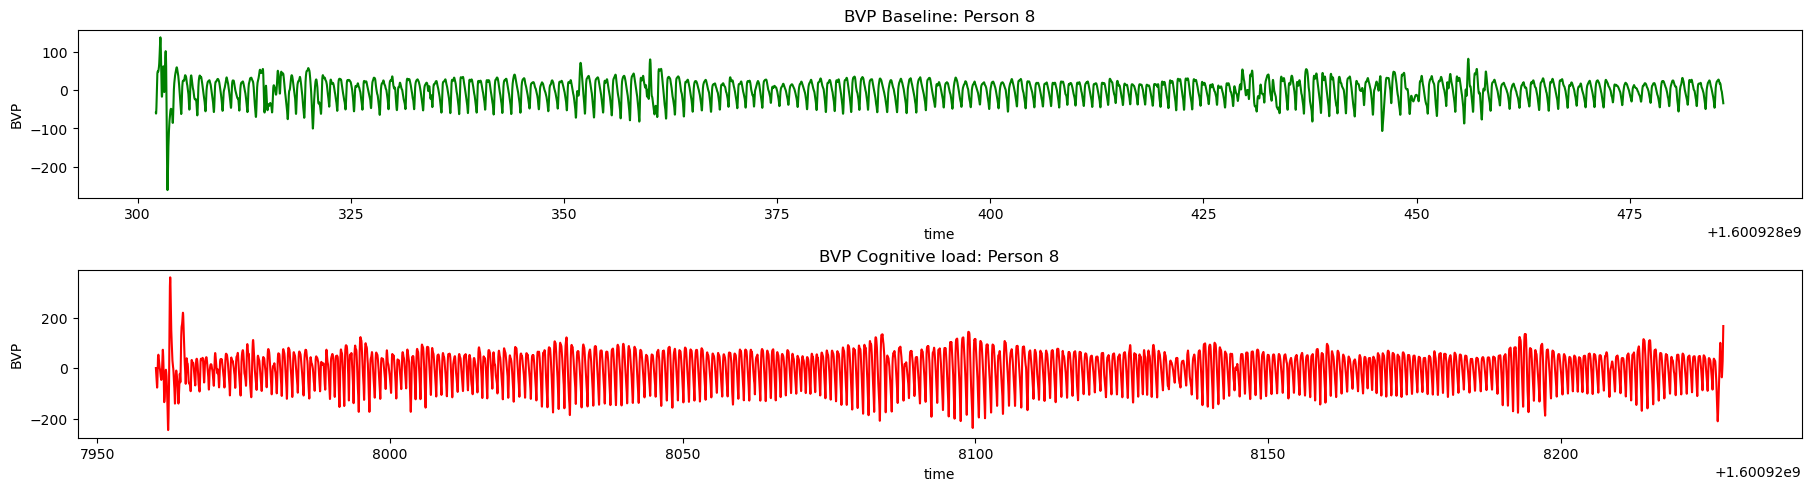

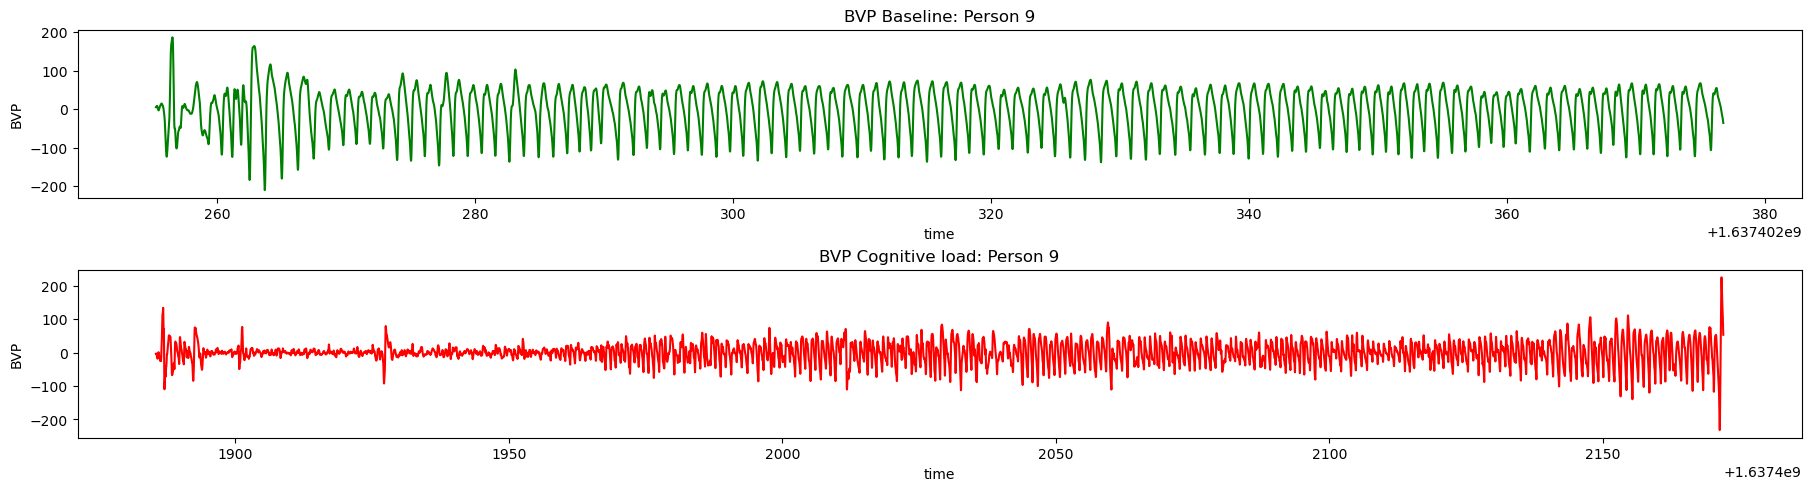

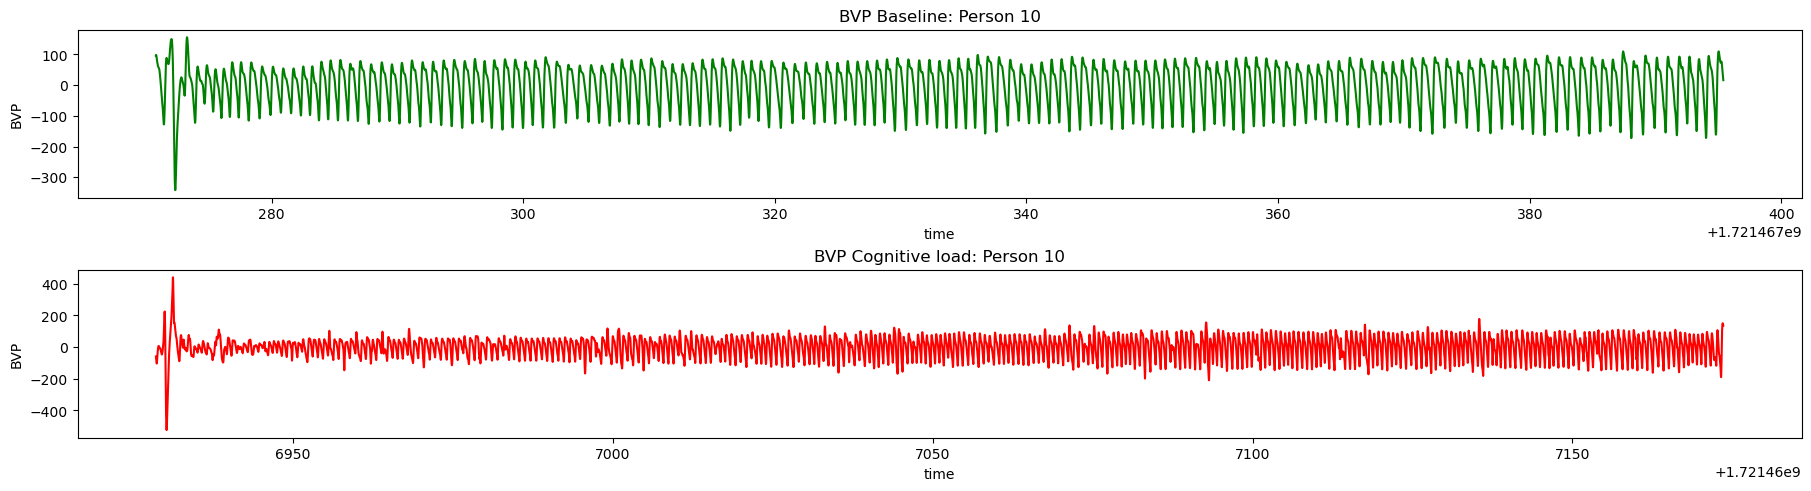

In [590]:
# retrieve unique person IDs from dataset in case data is corrupted so that there is no data for some person IDs
baseline_person_ids = baseline_empatica_bvp['person_id'].unique()
cognitive_person_ids = cognitive_load_empatica_bvp['person_id'].unique()

# get common and unique person_ids list for baseline and cognitive tests
person_ids = baseline_person_ids & cognitive_person_ids
person_ids.sort()

# prepare and display plots
for person_id in person_ids:
    
    # query baseline and cognitive load dataFrames by person_id and sort by time to ensure proper data display according to time
    baseline_BVP = baseline_empatica_bvp.query(f'person_id == {person_id}').sort_values(by=['time'])
    cognitive_BVP = cognitive_load_empatica_bvp.query(f'person_id == {person_id}').sort_values(by=['time'])
    
    fig, ax = plt.subplots(2, 1, layout='constrained')

    # generate plot for baseline BVP
    ax[0].plot(baseline_BVP['time'], baseline_BVP['bvp'], color='g')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('BVP')
    ax[0].title.set_text(f'BVP Baseline: Person {person_id}')

    # generate plot for cognitive load BVP
    ax[1].plot(cognitive_BVP['time'], cognitive_BVP['bvp'], color='r')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('BVP')
    ax[1].title.set_text(f'BVP Cognitive load: Person {person_id}')

    fig.set_figwidth(18)

plt.show()

## Plots illustrating temperature change in time during rest and cognitive load time

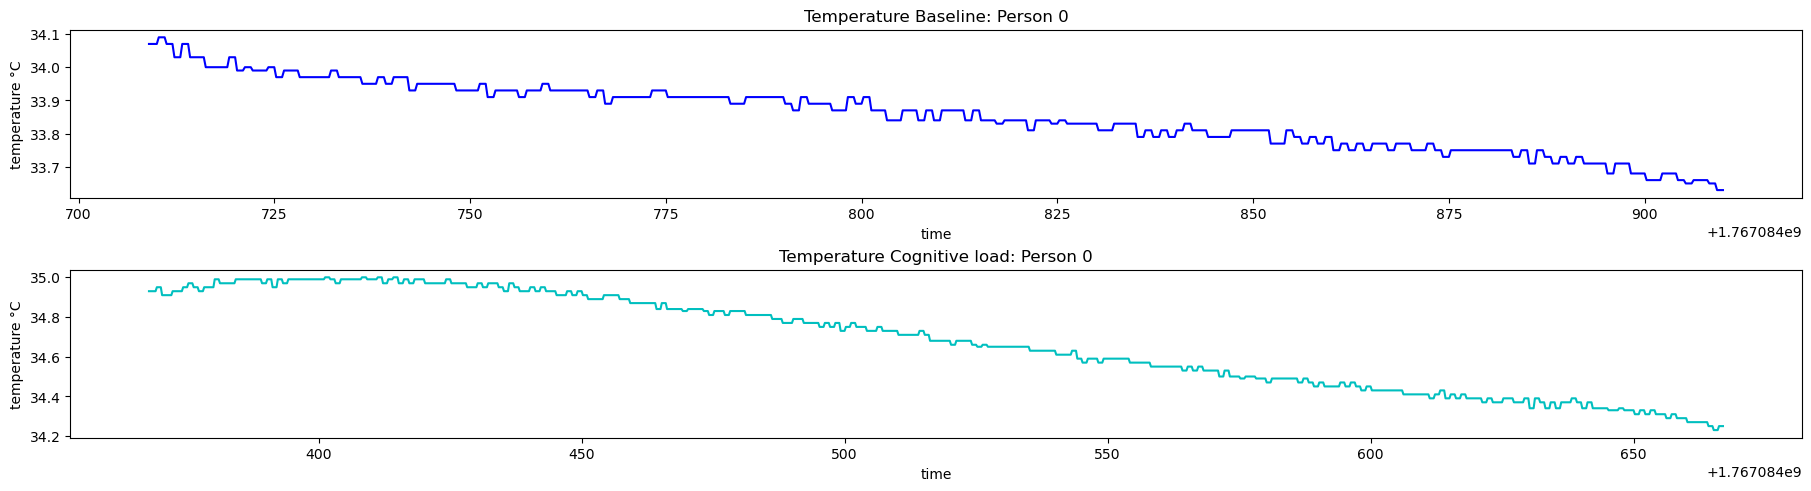

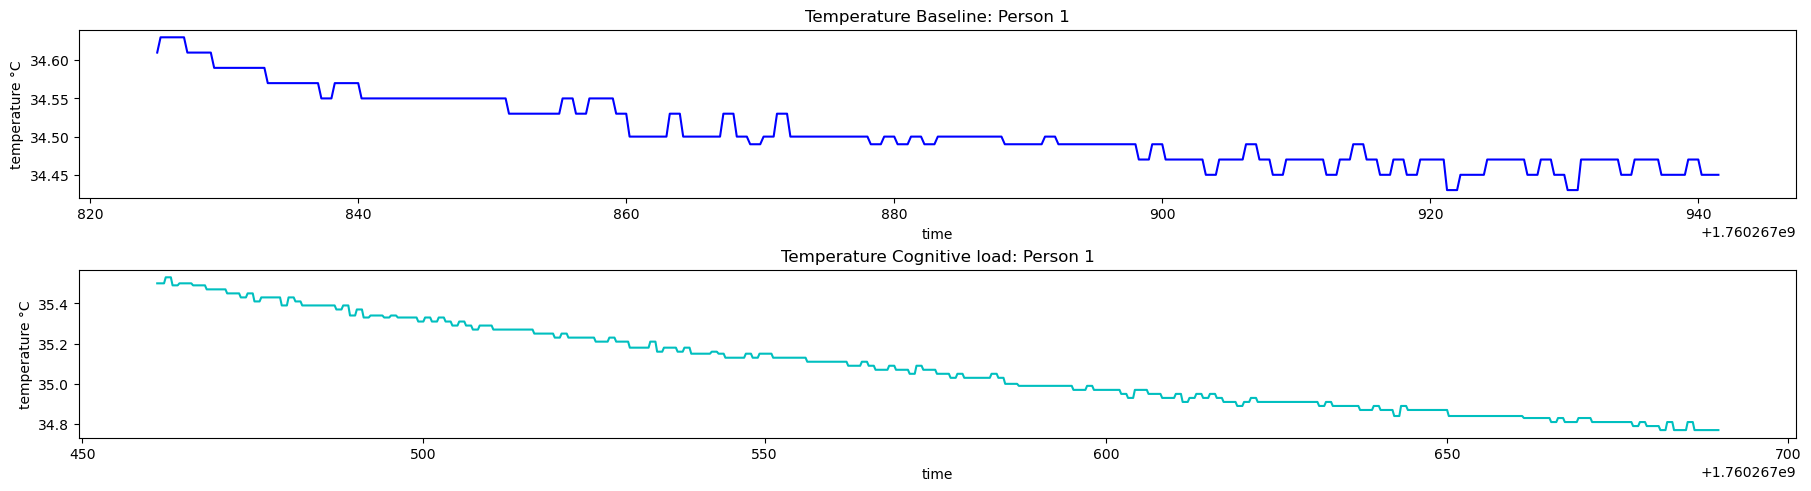

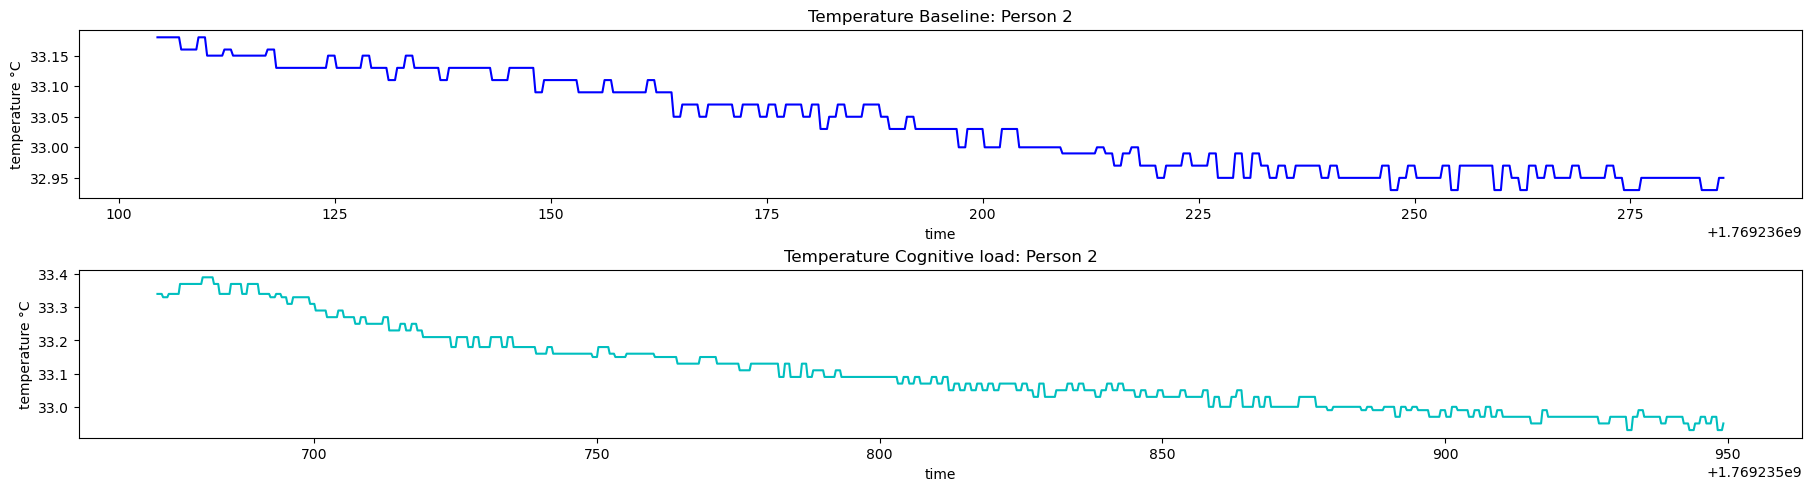

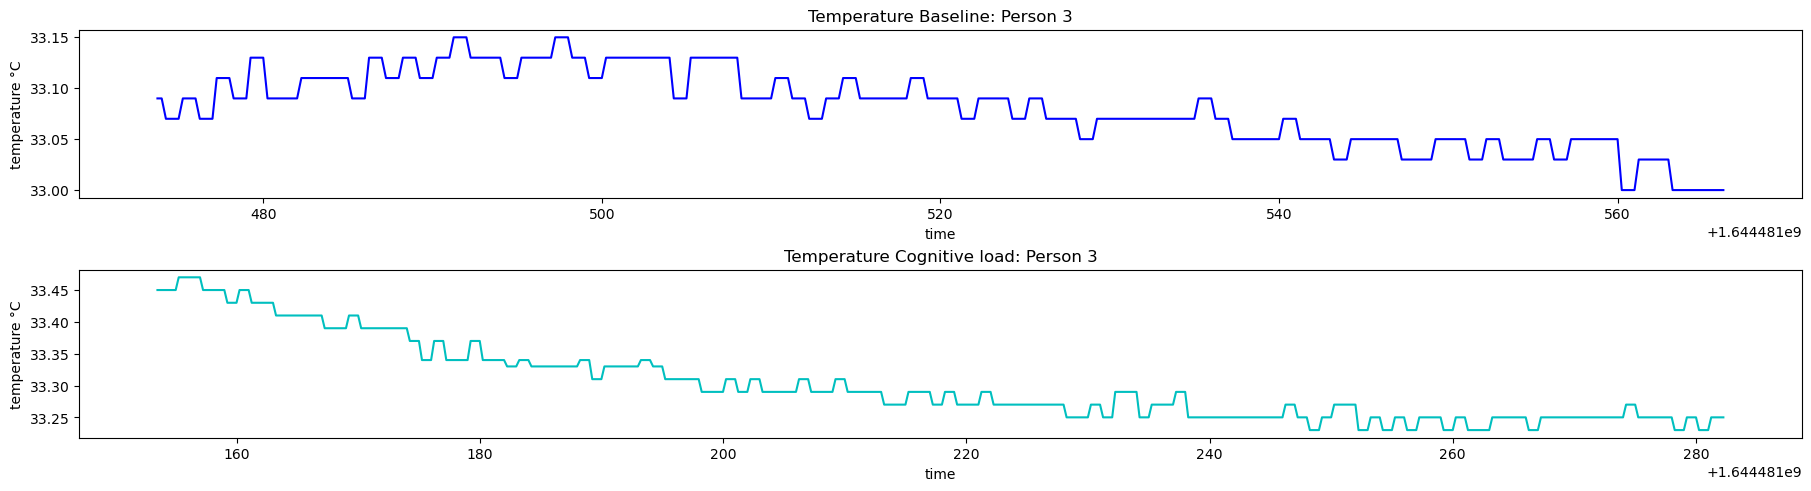

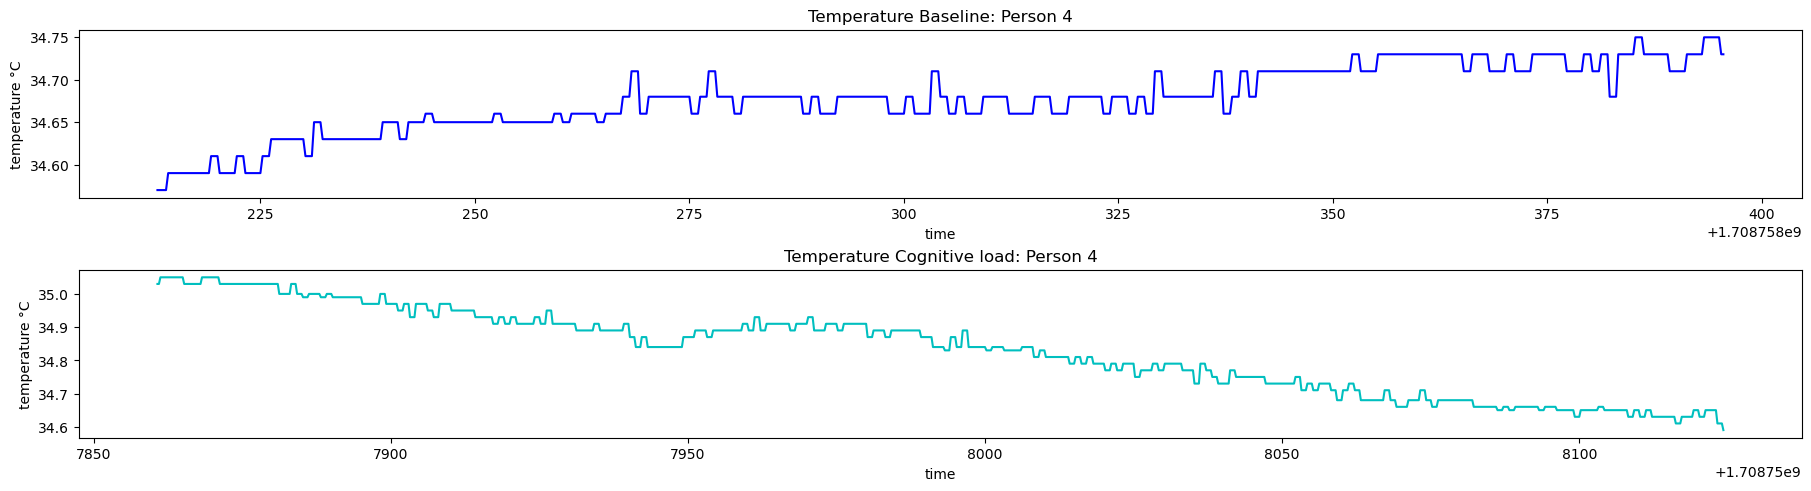

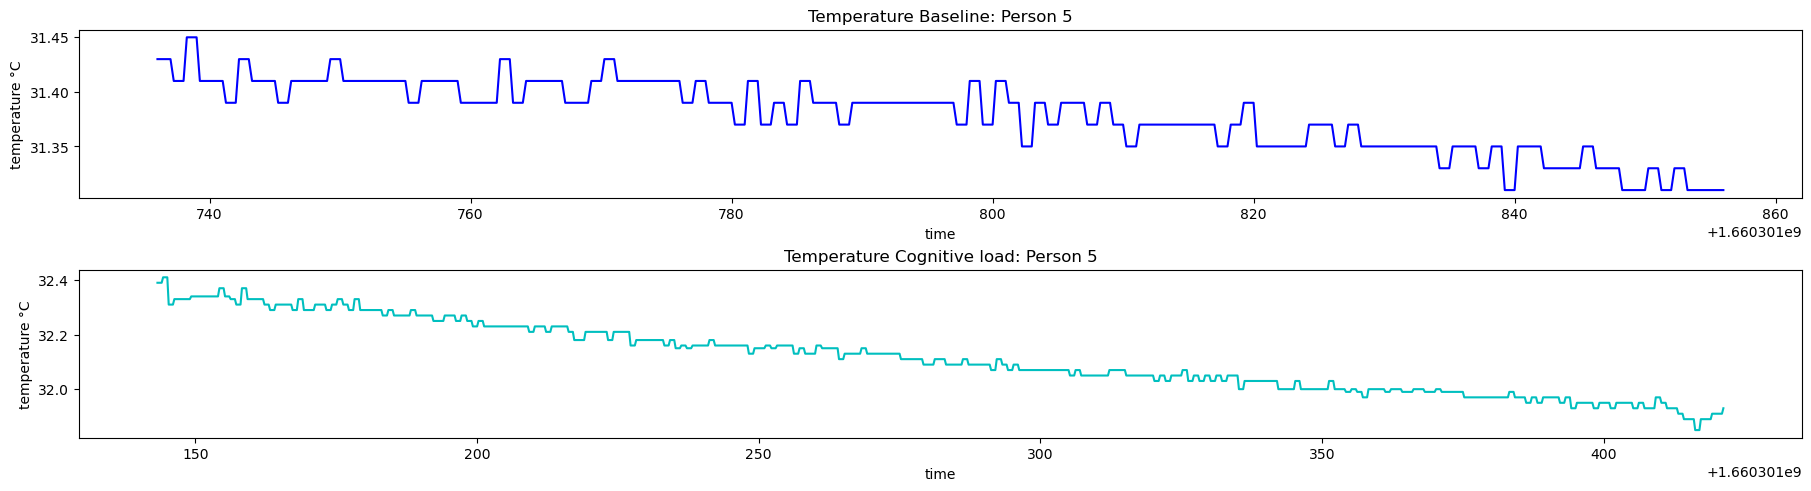

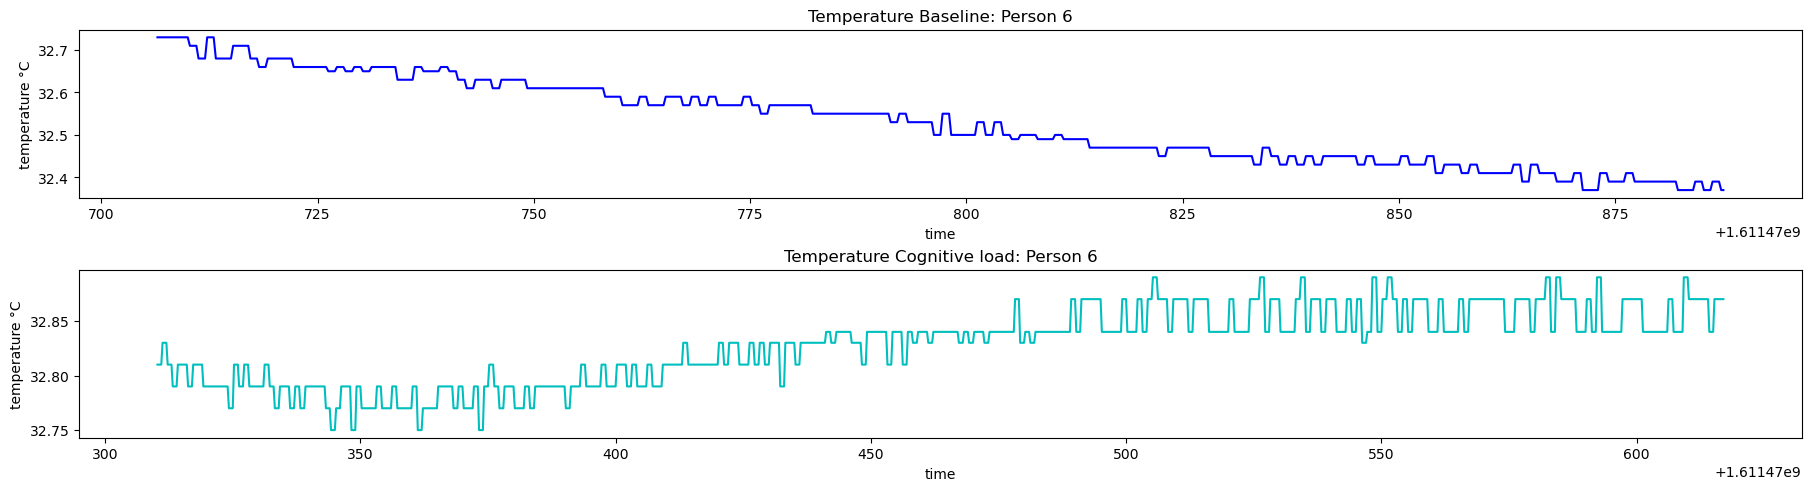

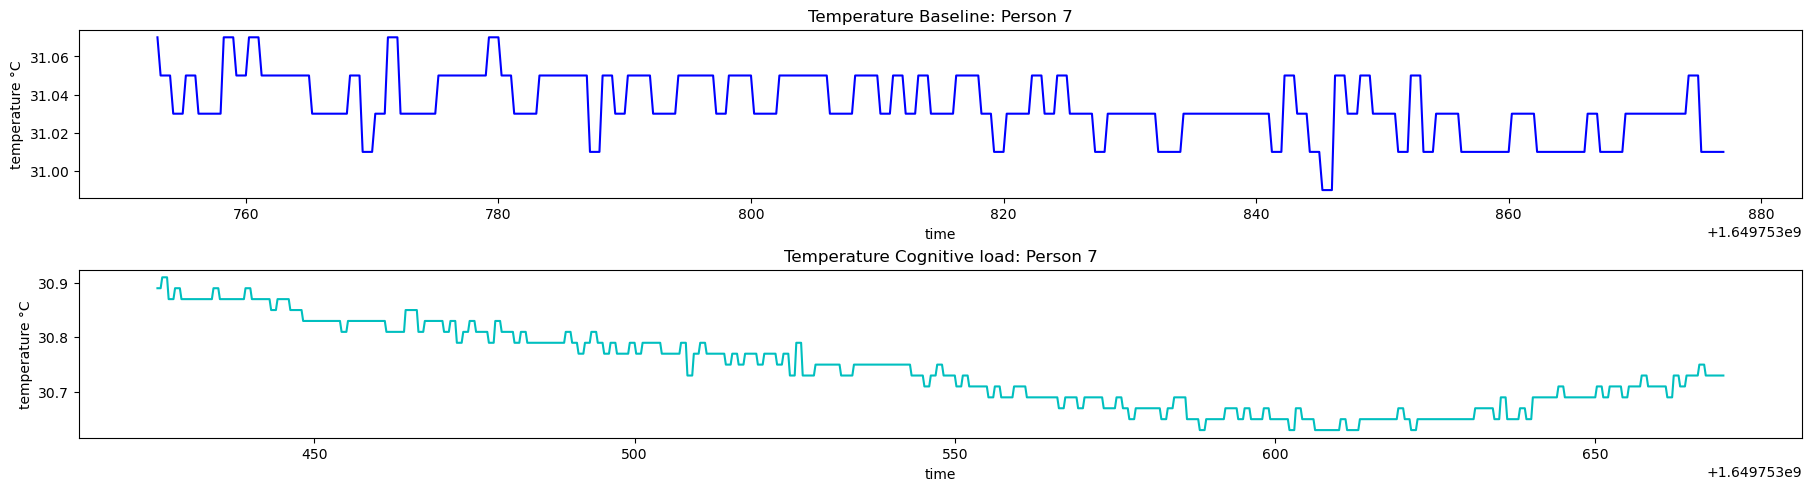

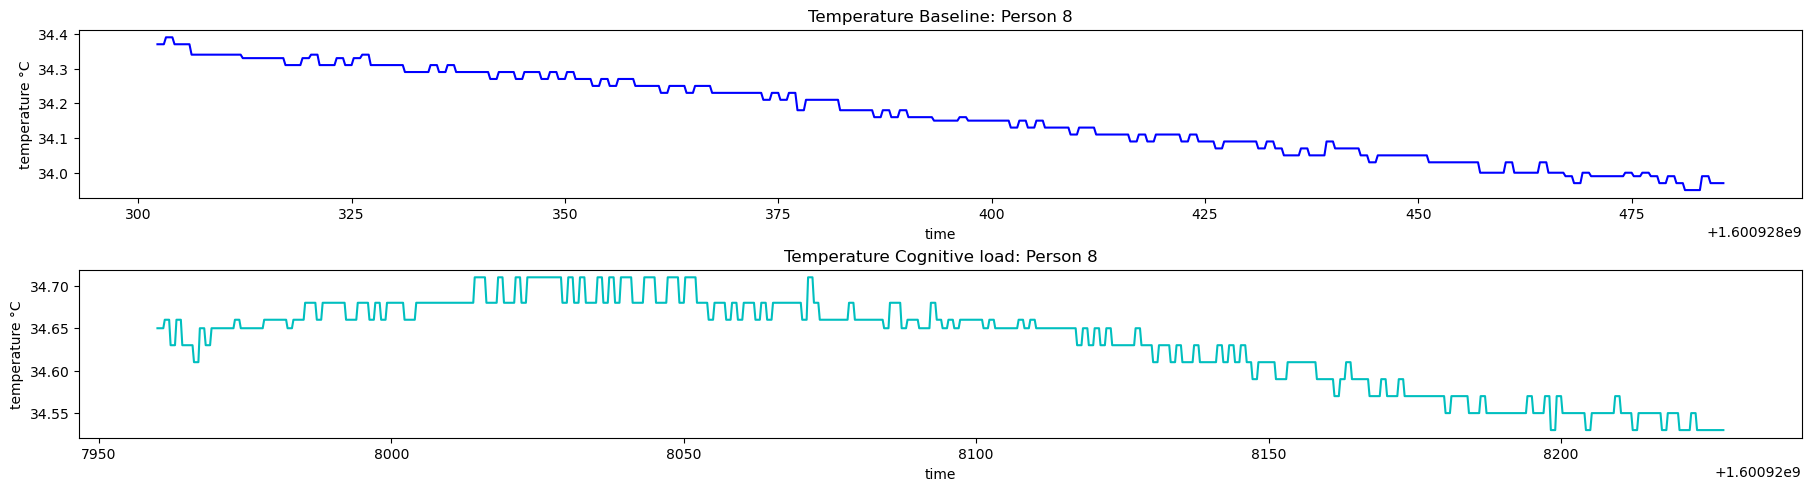

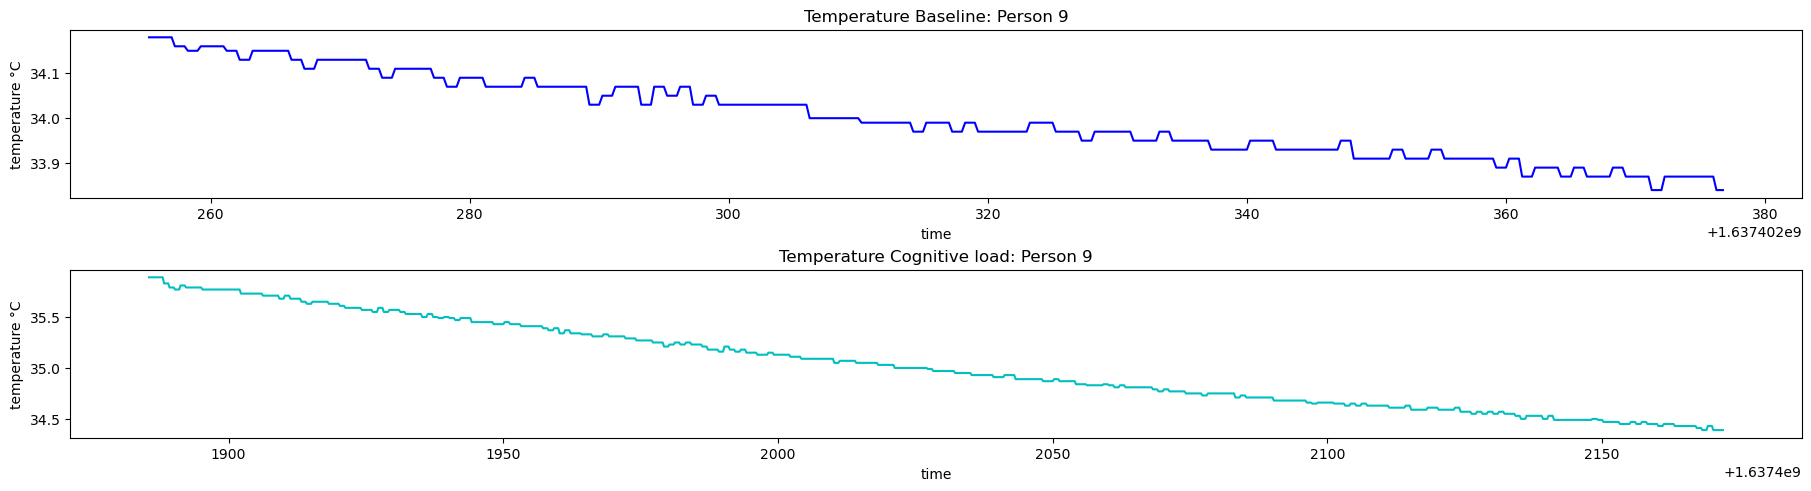

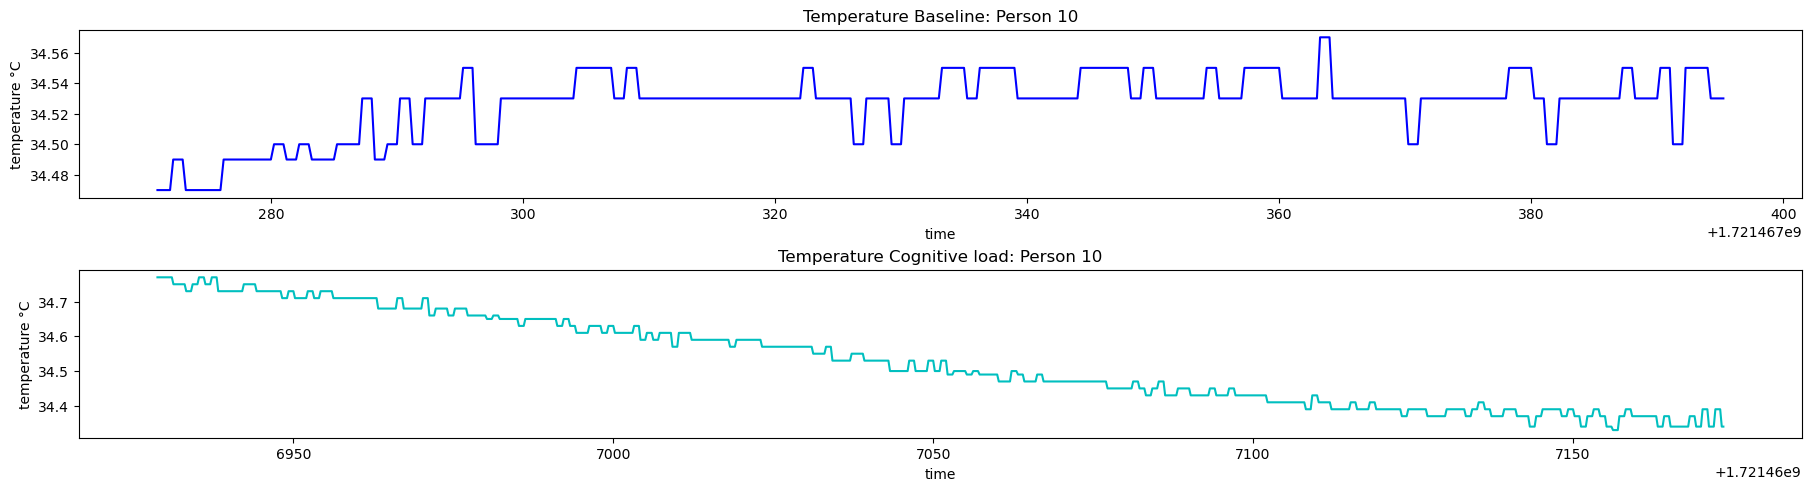

In [732]:
baseline_person_ids = baseline_empatica_temp['person_id'].unique()
cognitive_person_ids = cognitive_load_empatica_temp['person_id'].unique()

# get common and unique person_ids list for baseline and cognitive tests
person_ids = baseline_person_ids & cognitive_person_ids
person_ids.sort()

for person_id in person_ids:
    bt = baseline_empatica_temp.query(f'person_id == {person_id}').sort_values(by=['time'])
    ct = cognitive_load_empatica_temp.query(f'person_id == {person_id}').sort_values(by=['time'])

    fig, ax = plt.subplots(2, 1, layout='constrained')

    # generate plots for time
    ax[0].plot(bt['time'], bt['temp'], color='b')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('temperature °C')
    ax[0].title.set_text(f'Temperature Baseline: Person {person_id}')
    ax[1].plot(ct['time'], ct['temp'], color='c')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('temperature °C')
    ax[1].title.set_text(f'Temperature Cognitive load: Person {person_id}')
    fig.set_figwidth(18)

plt.show()

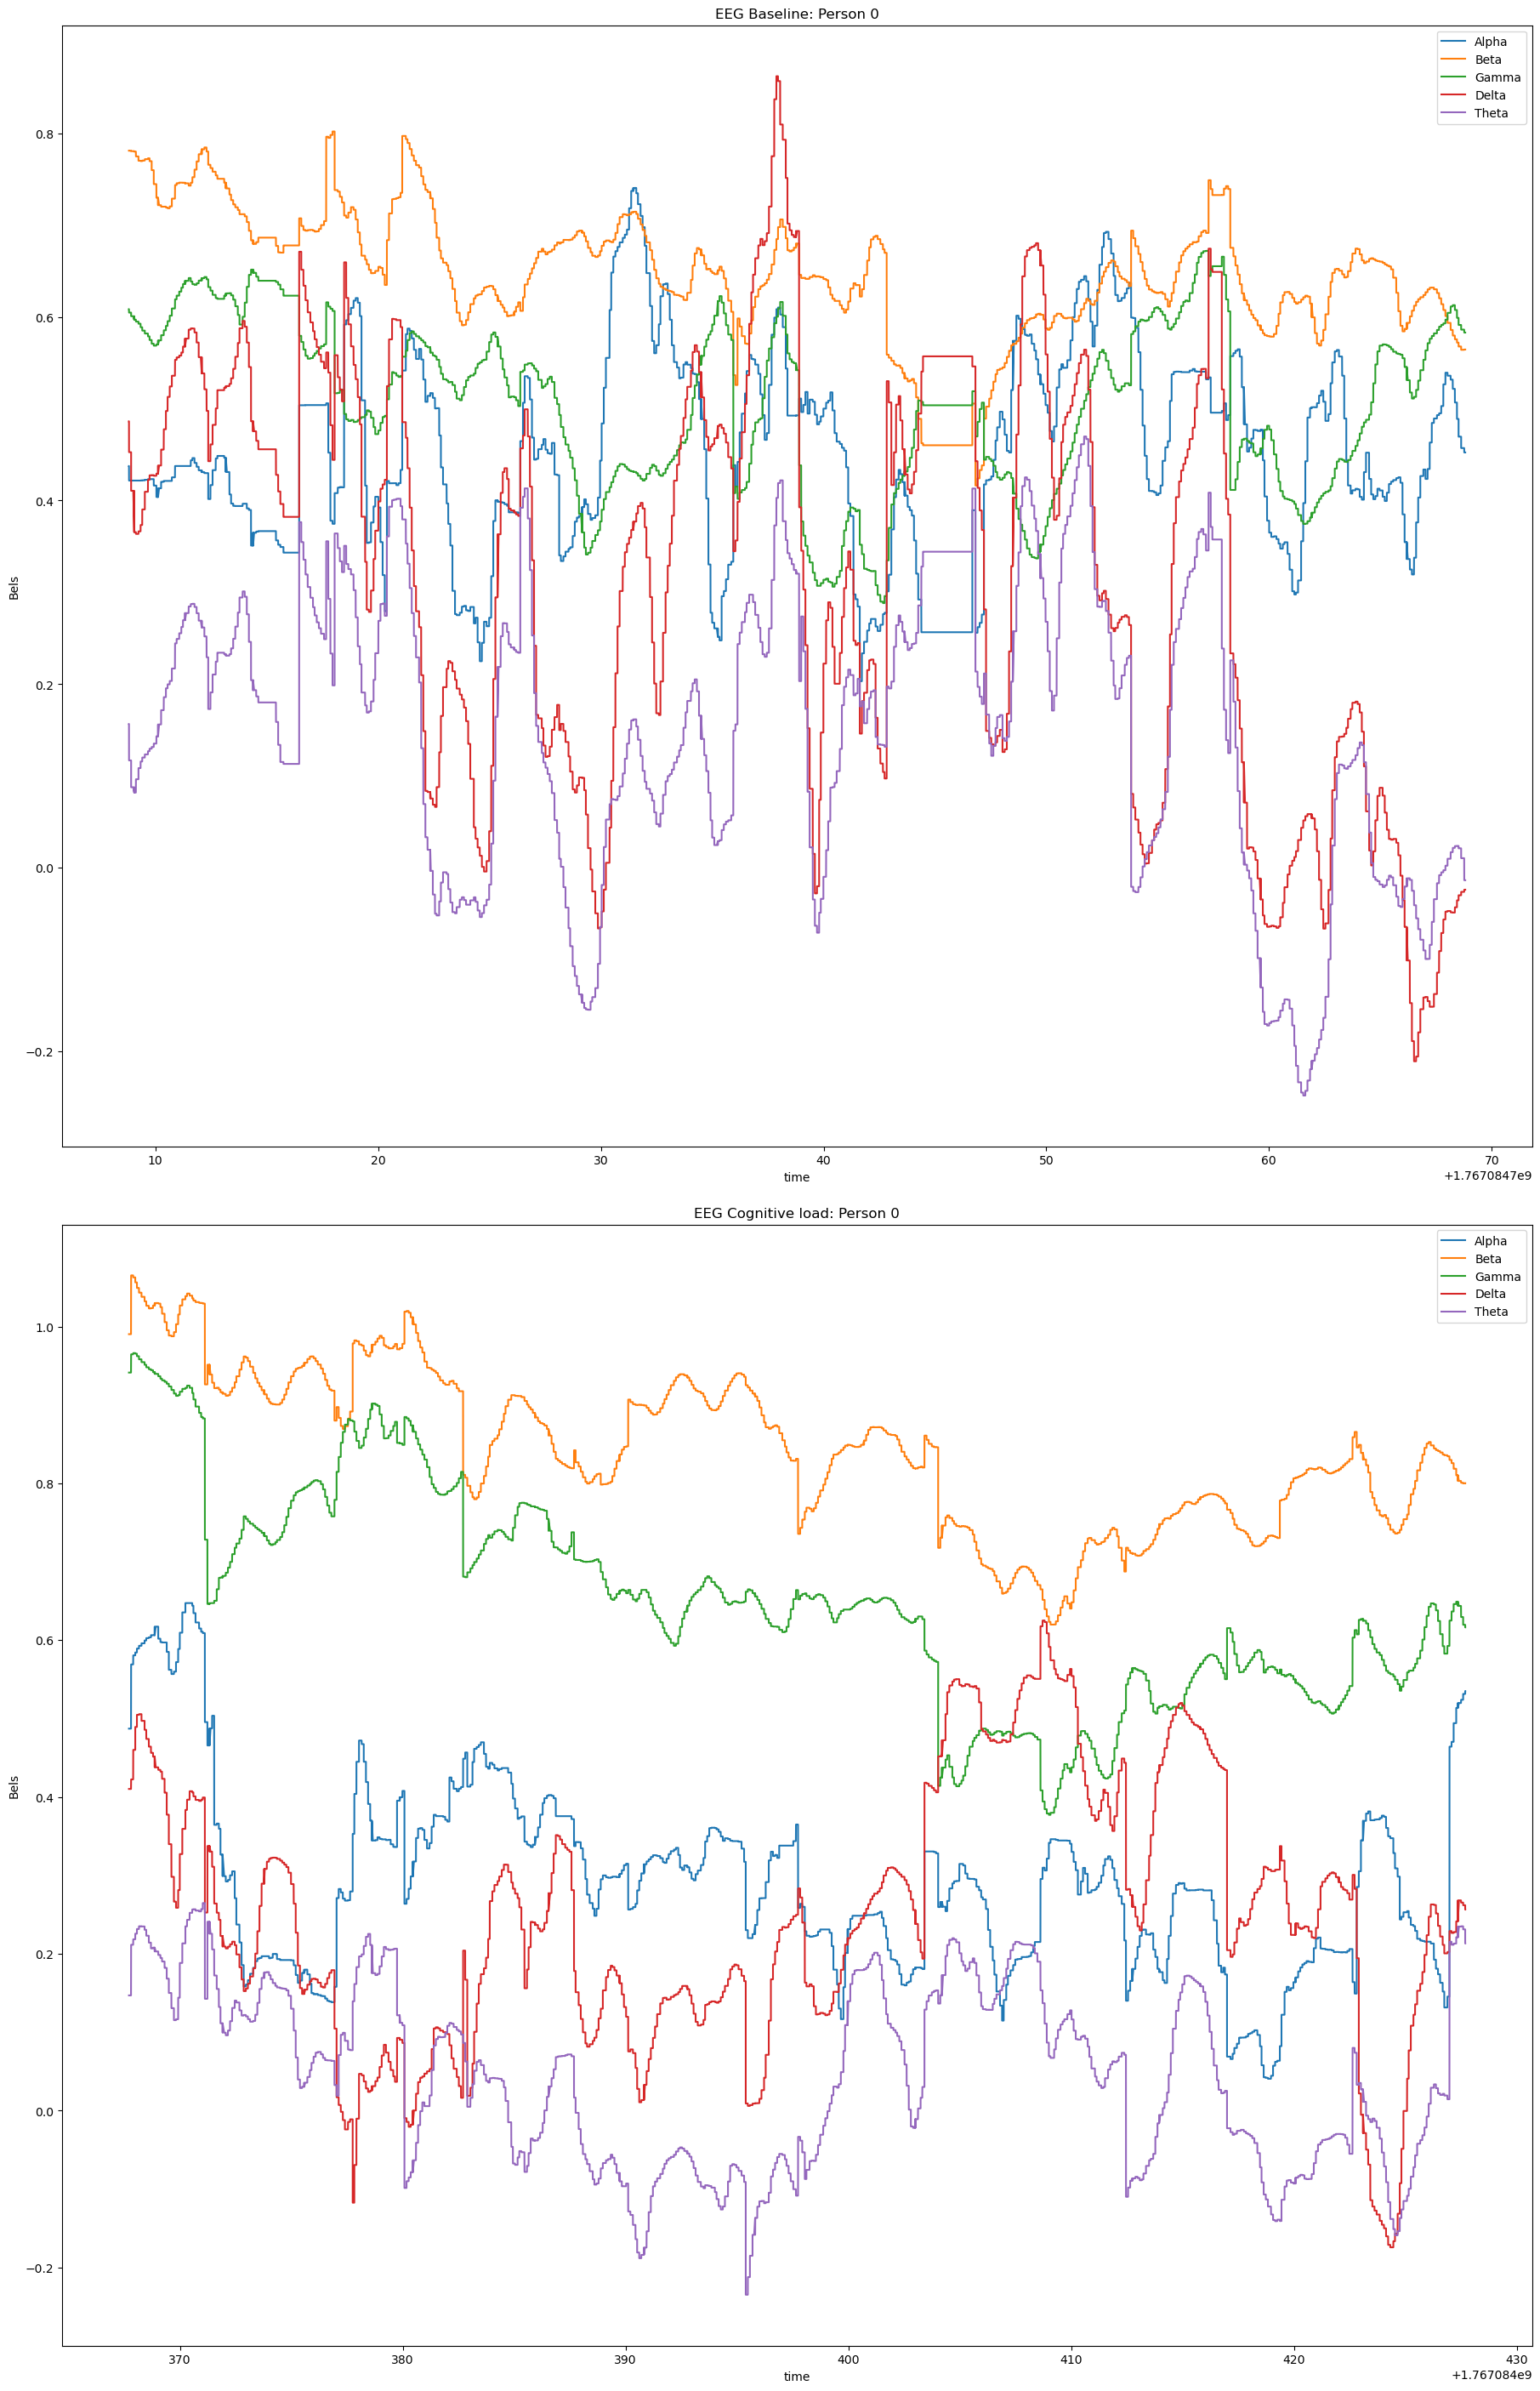

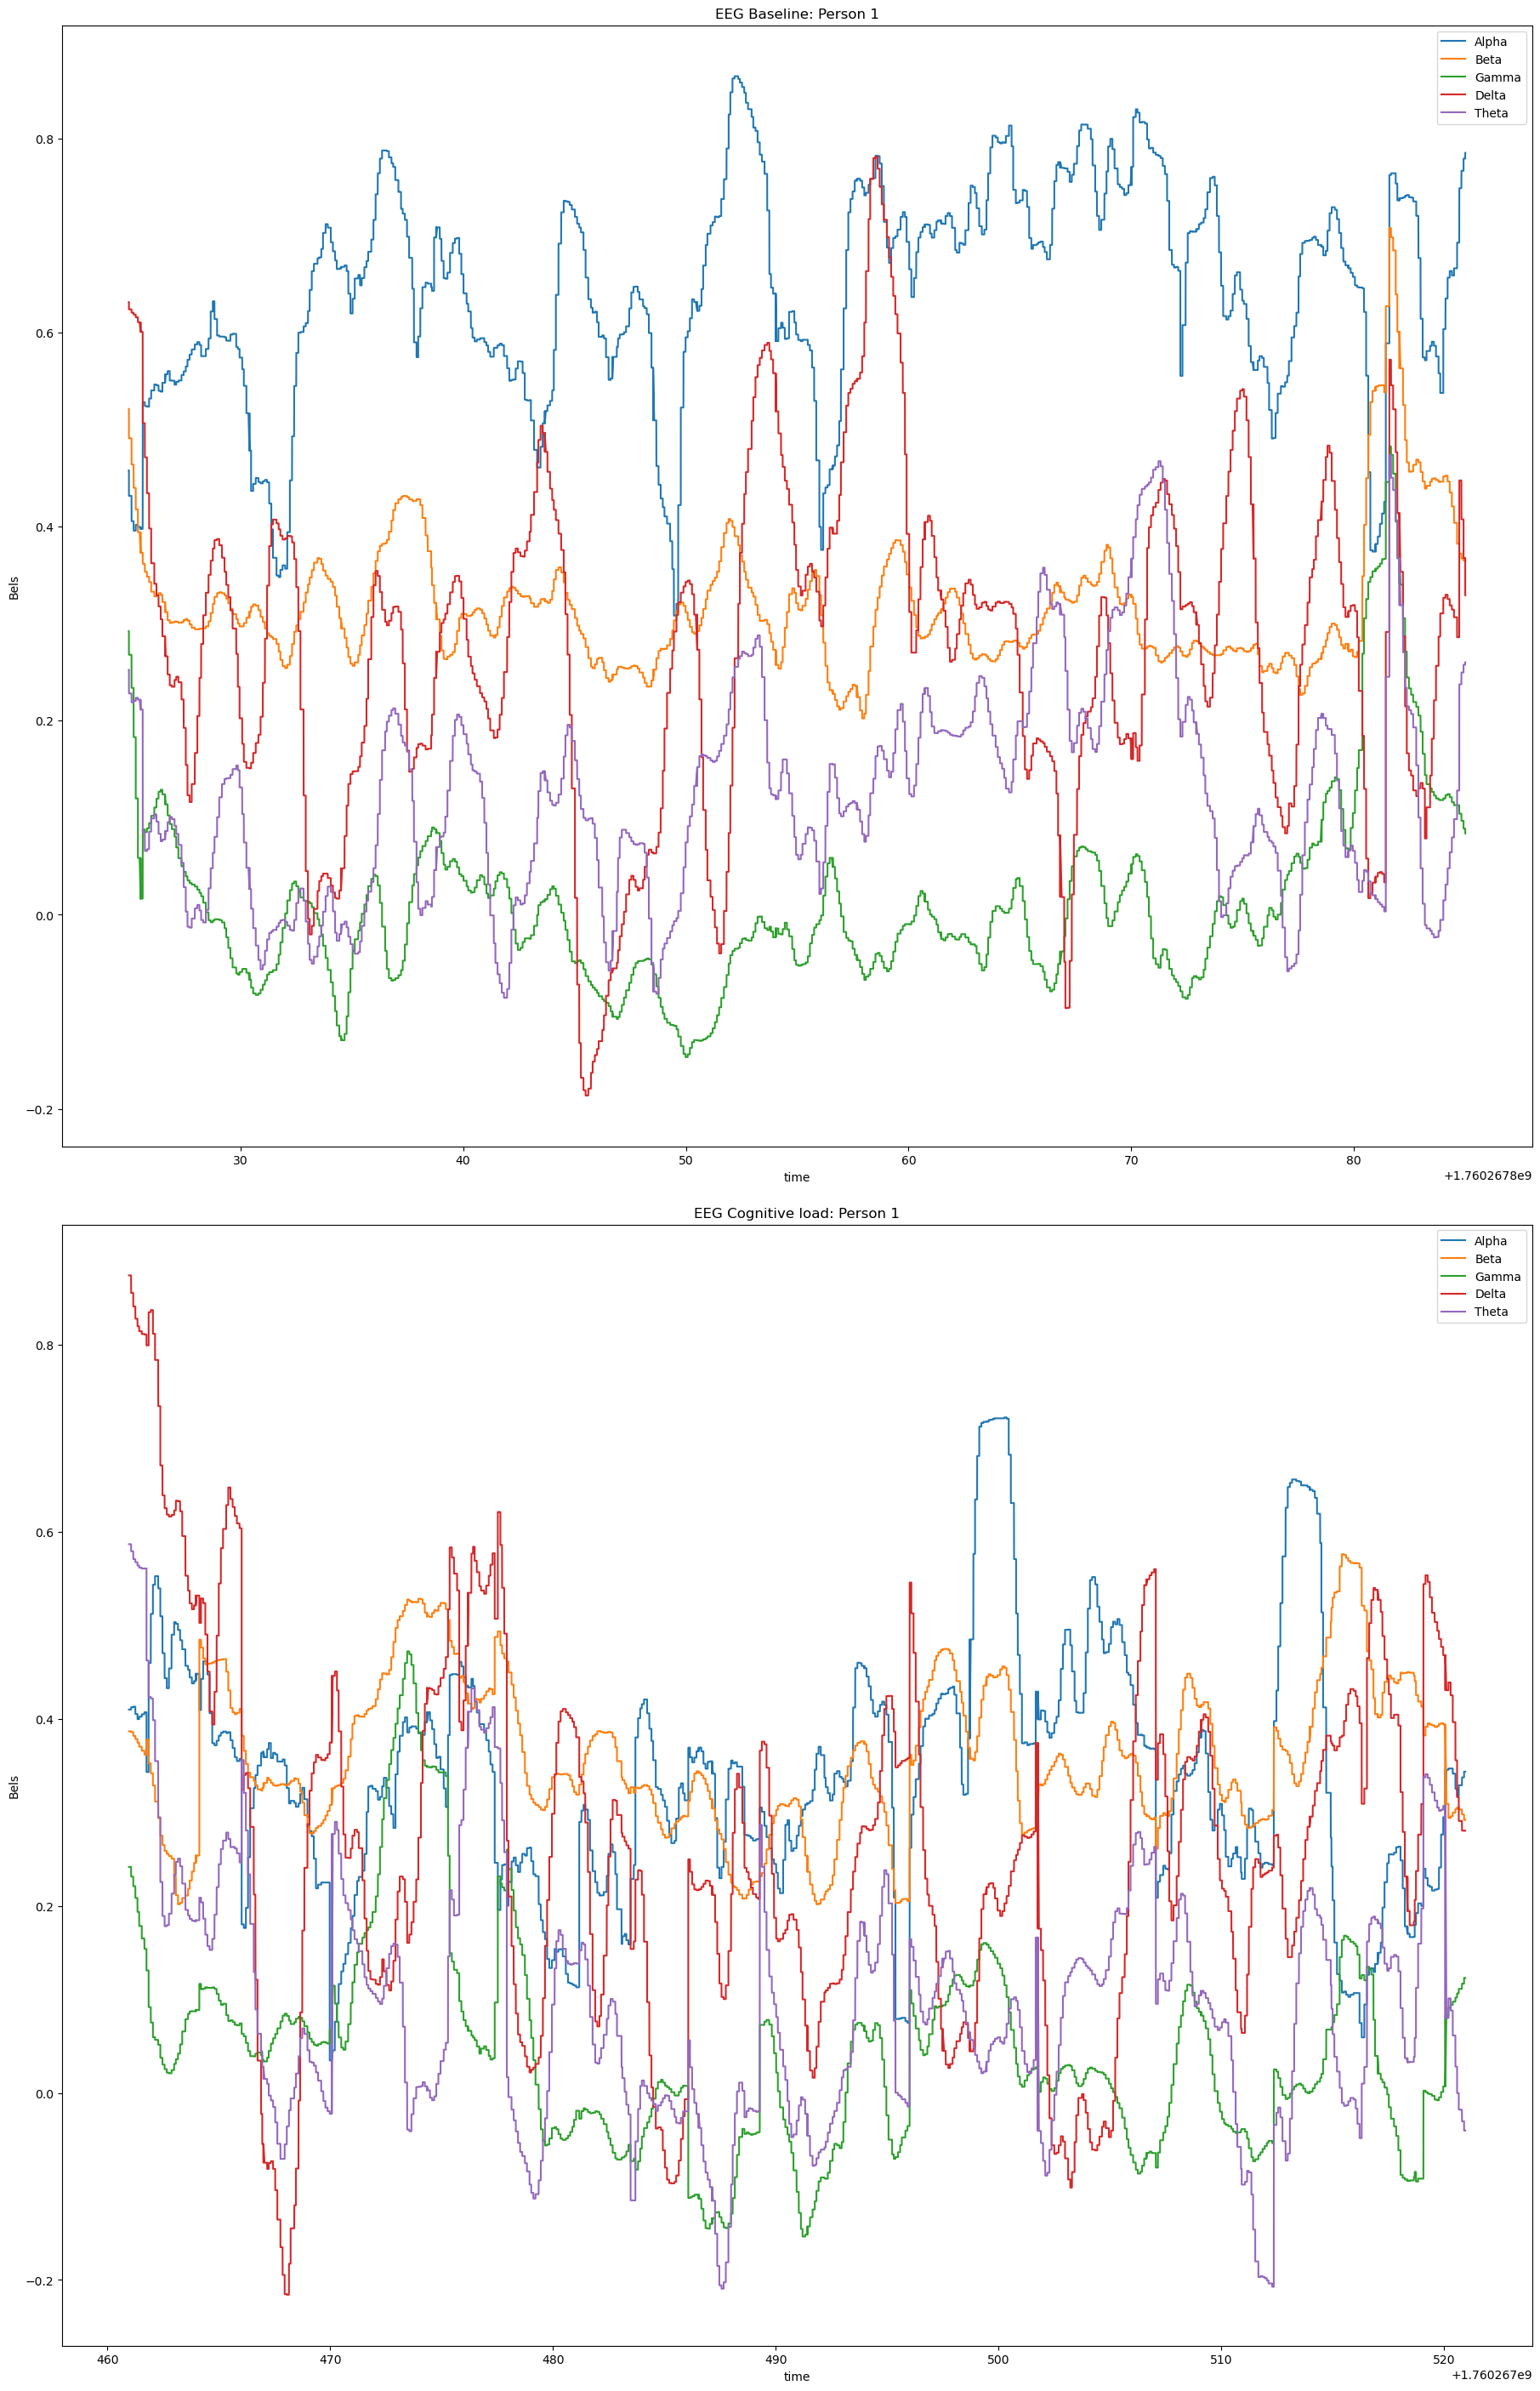

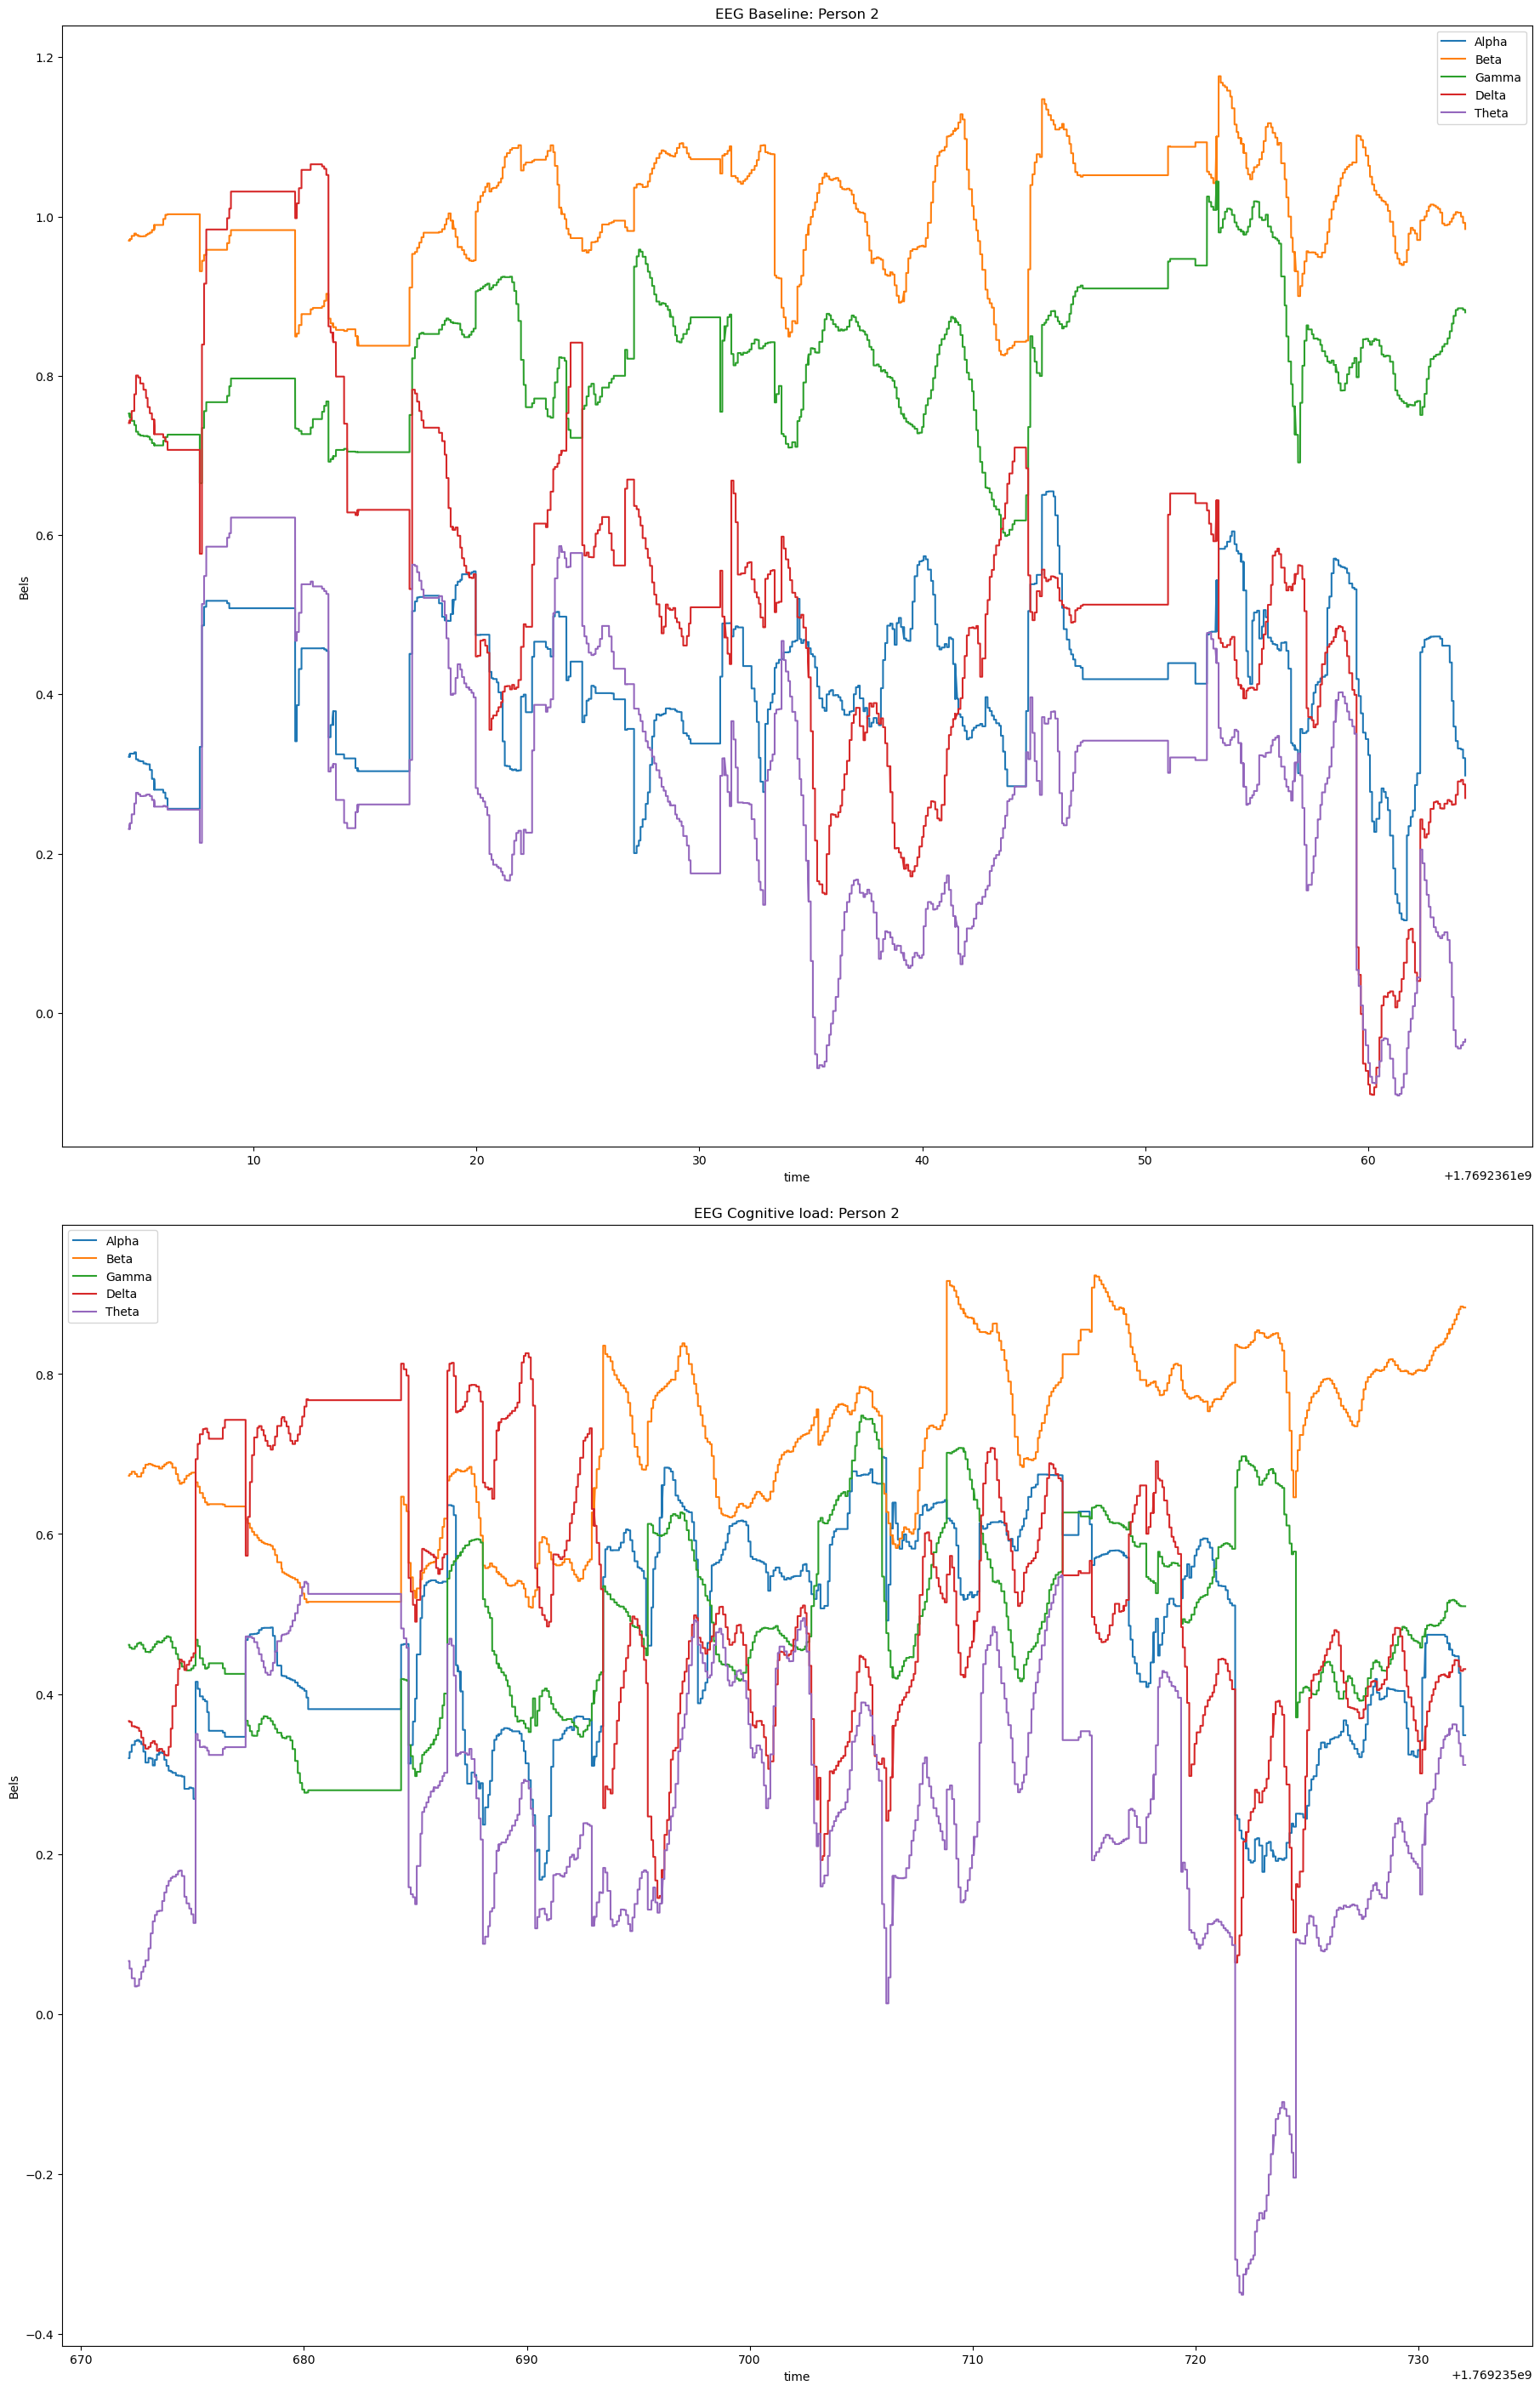

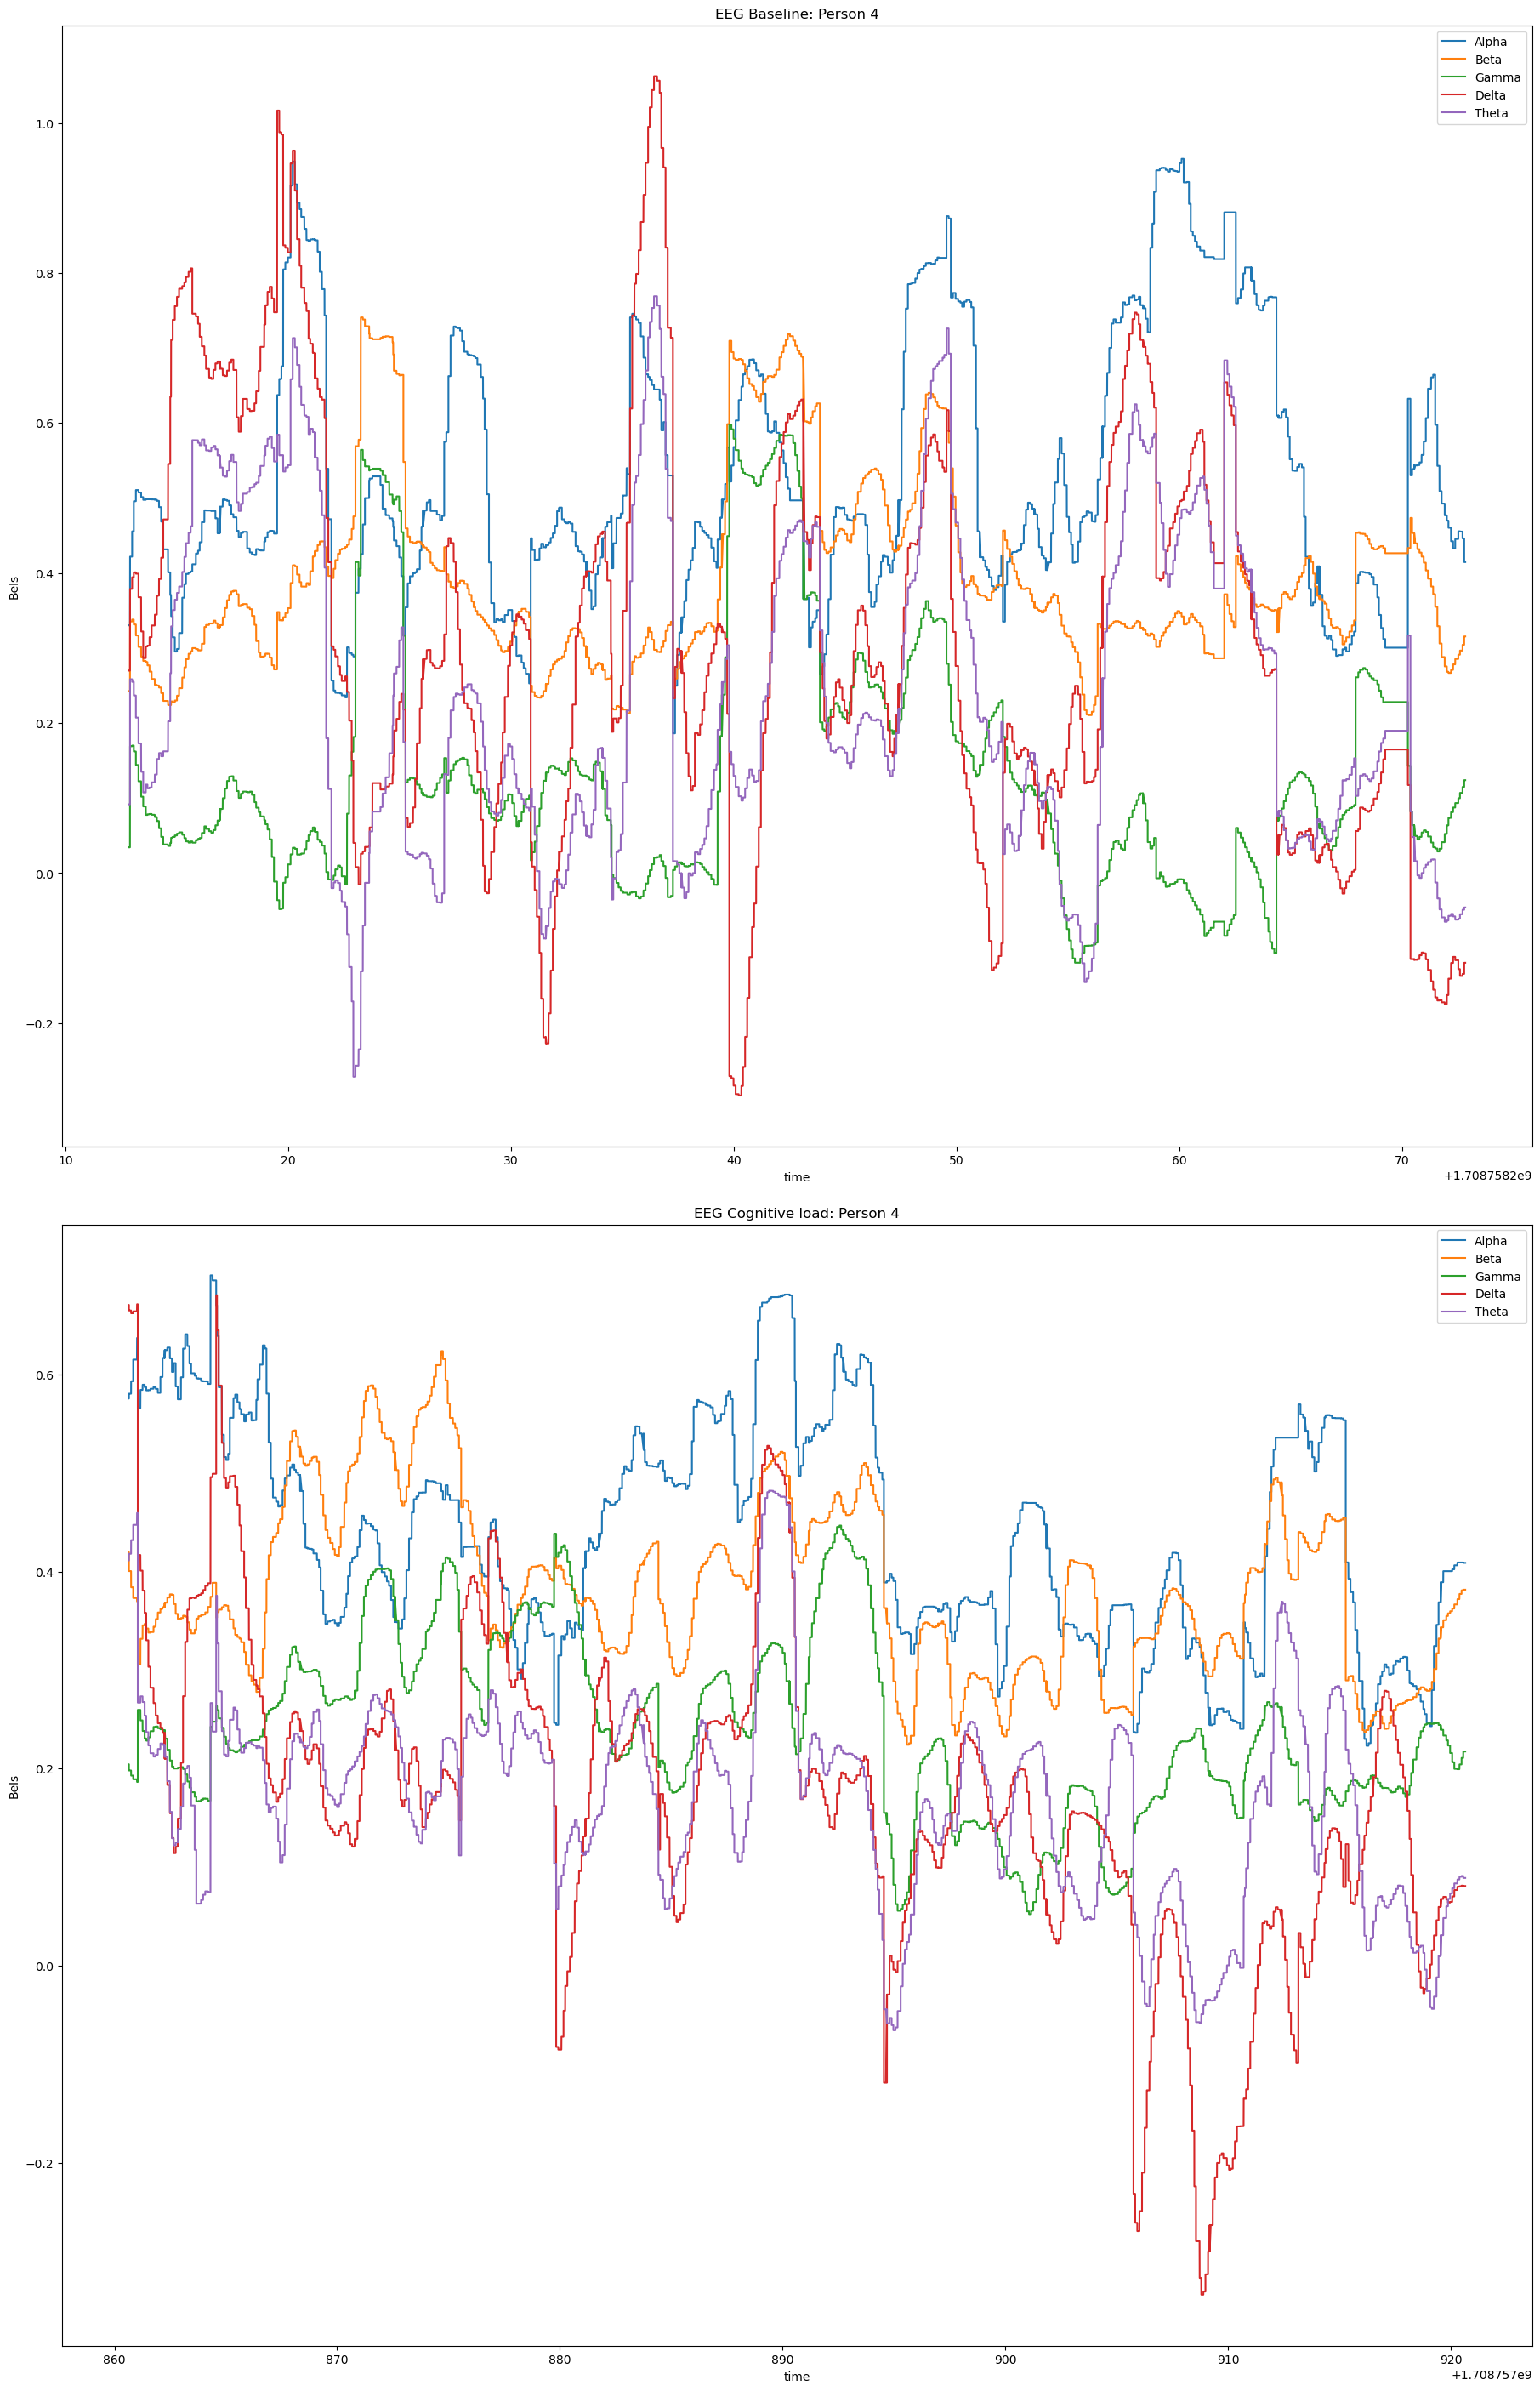

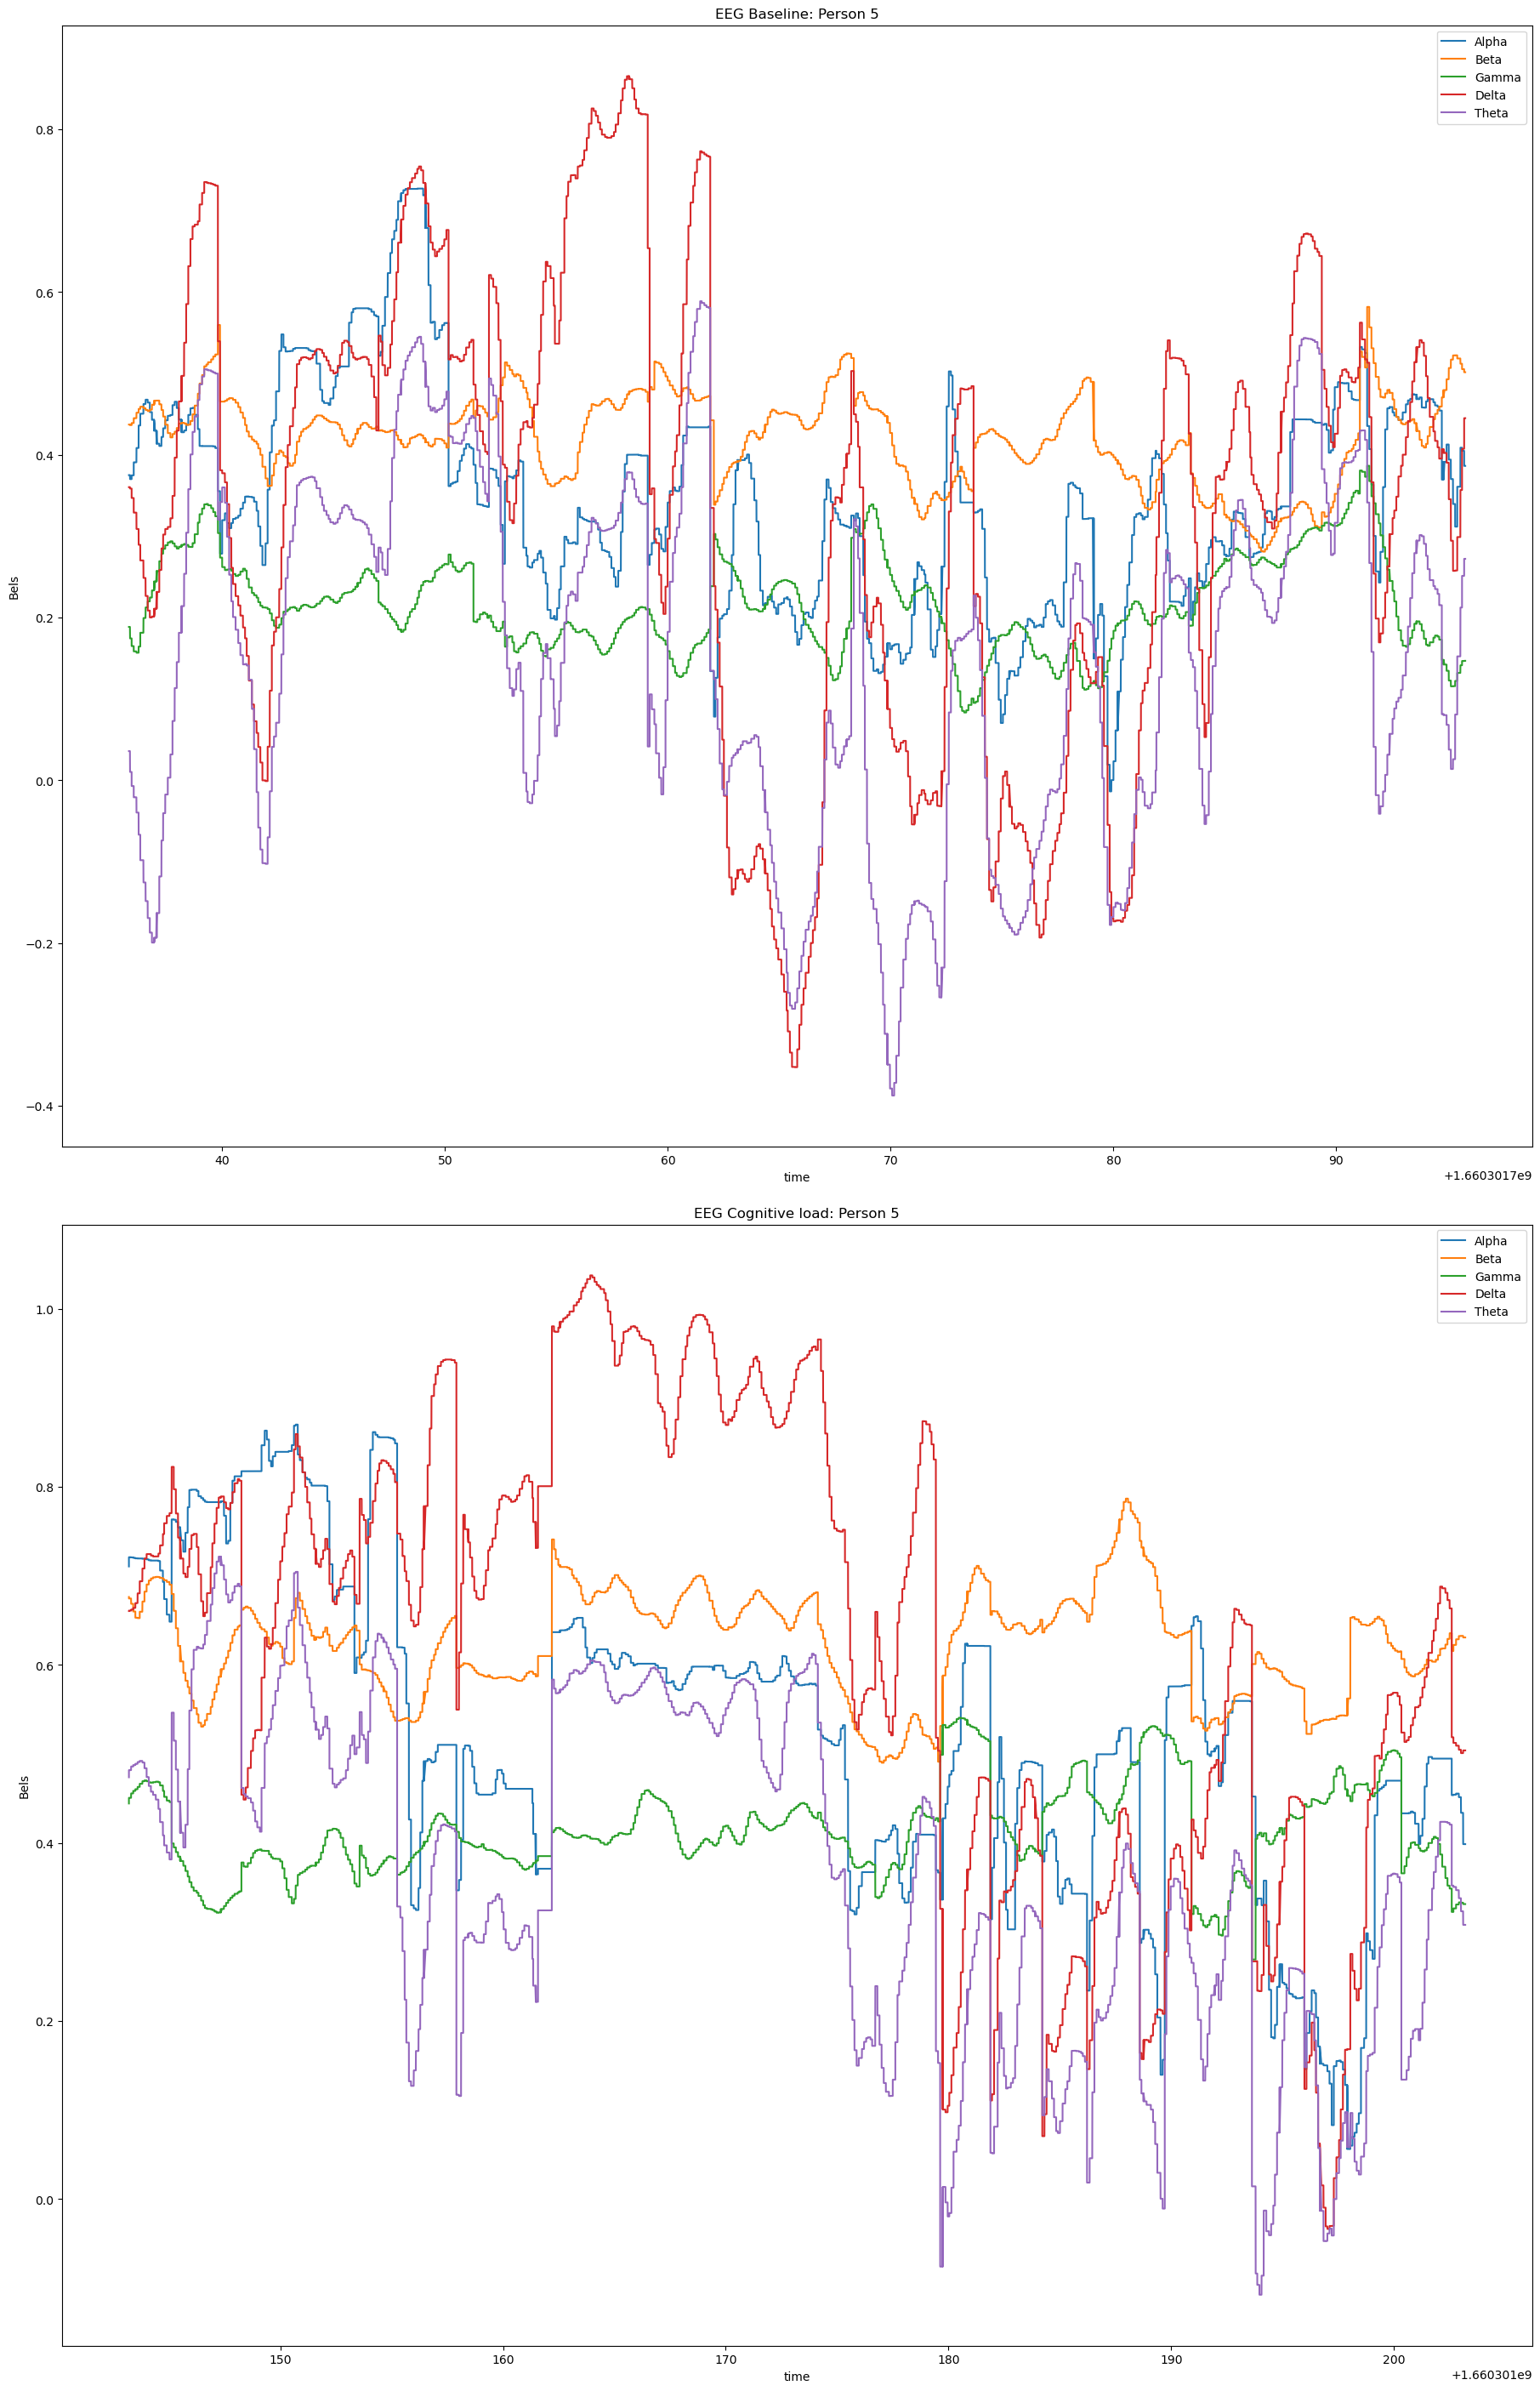

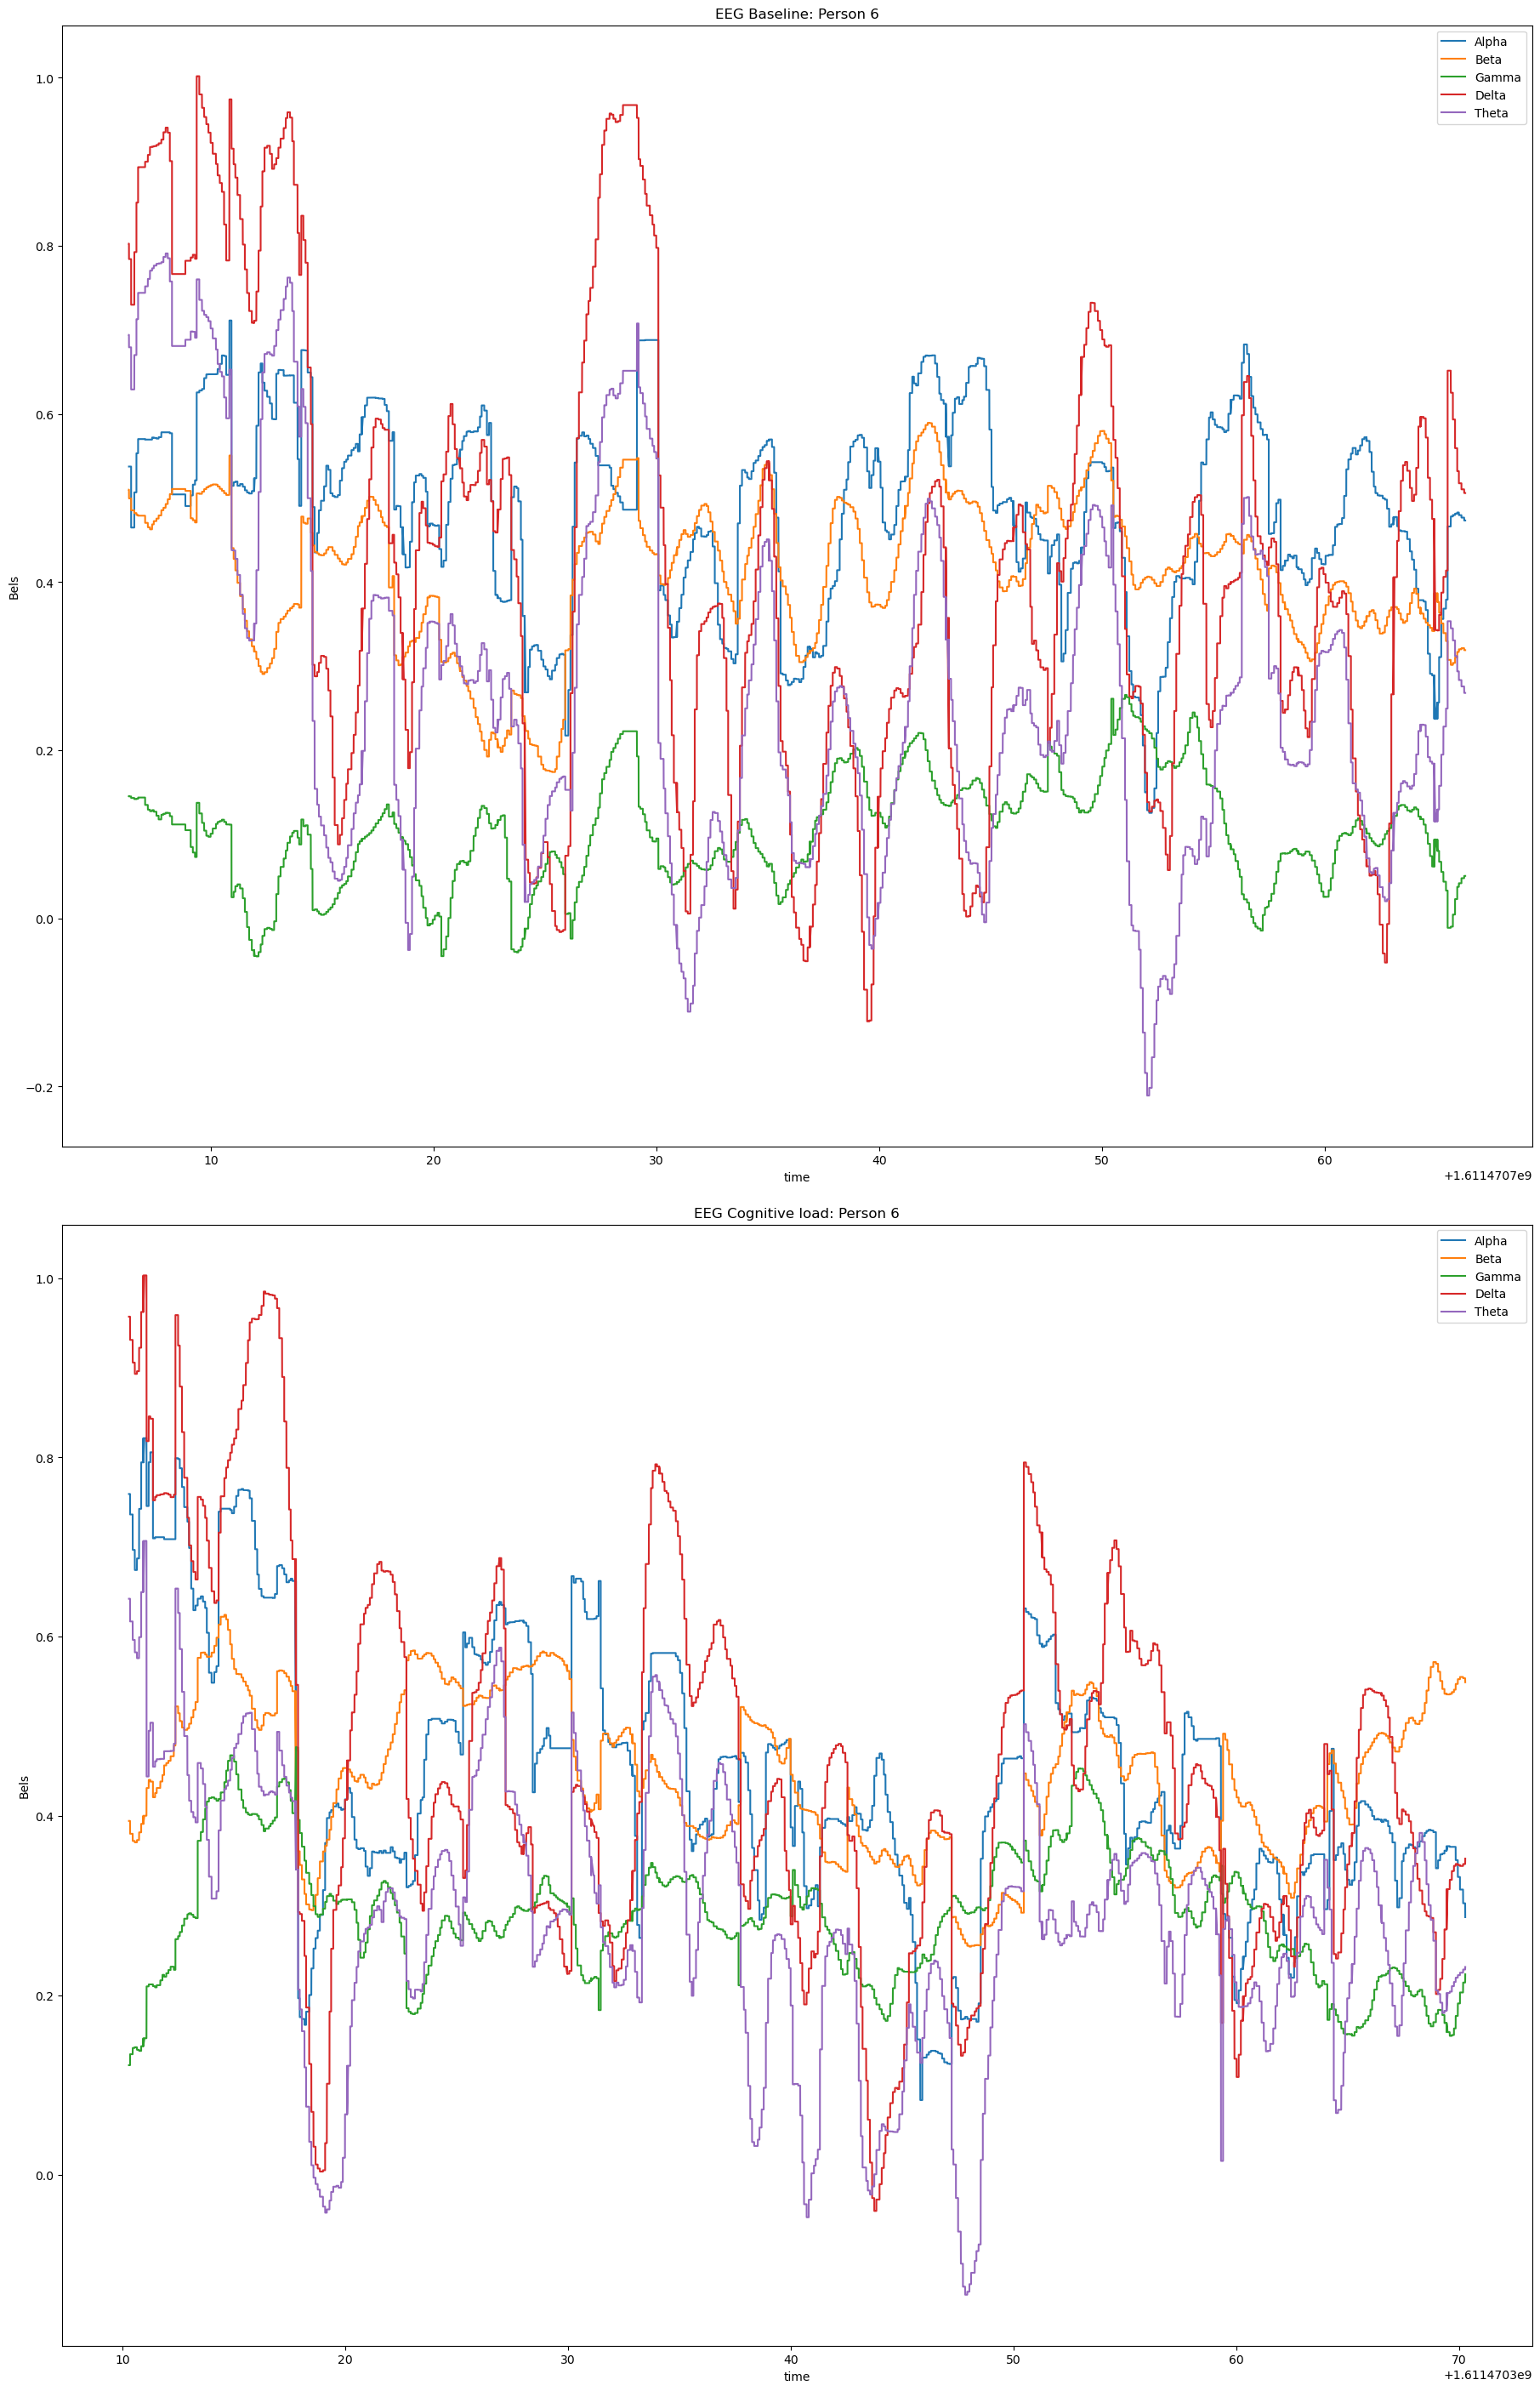

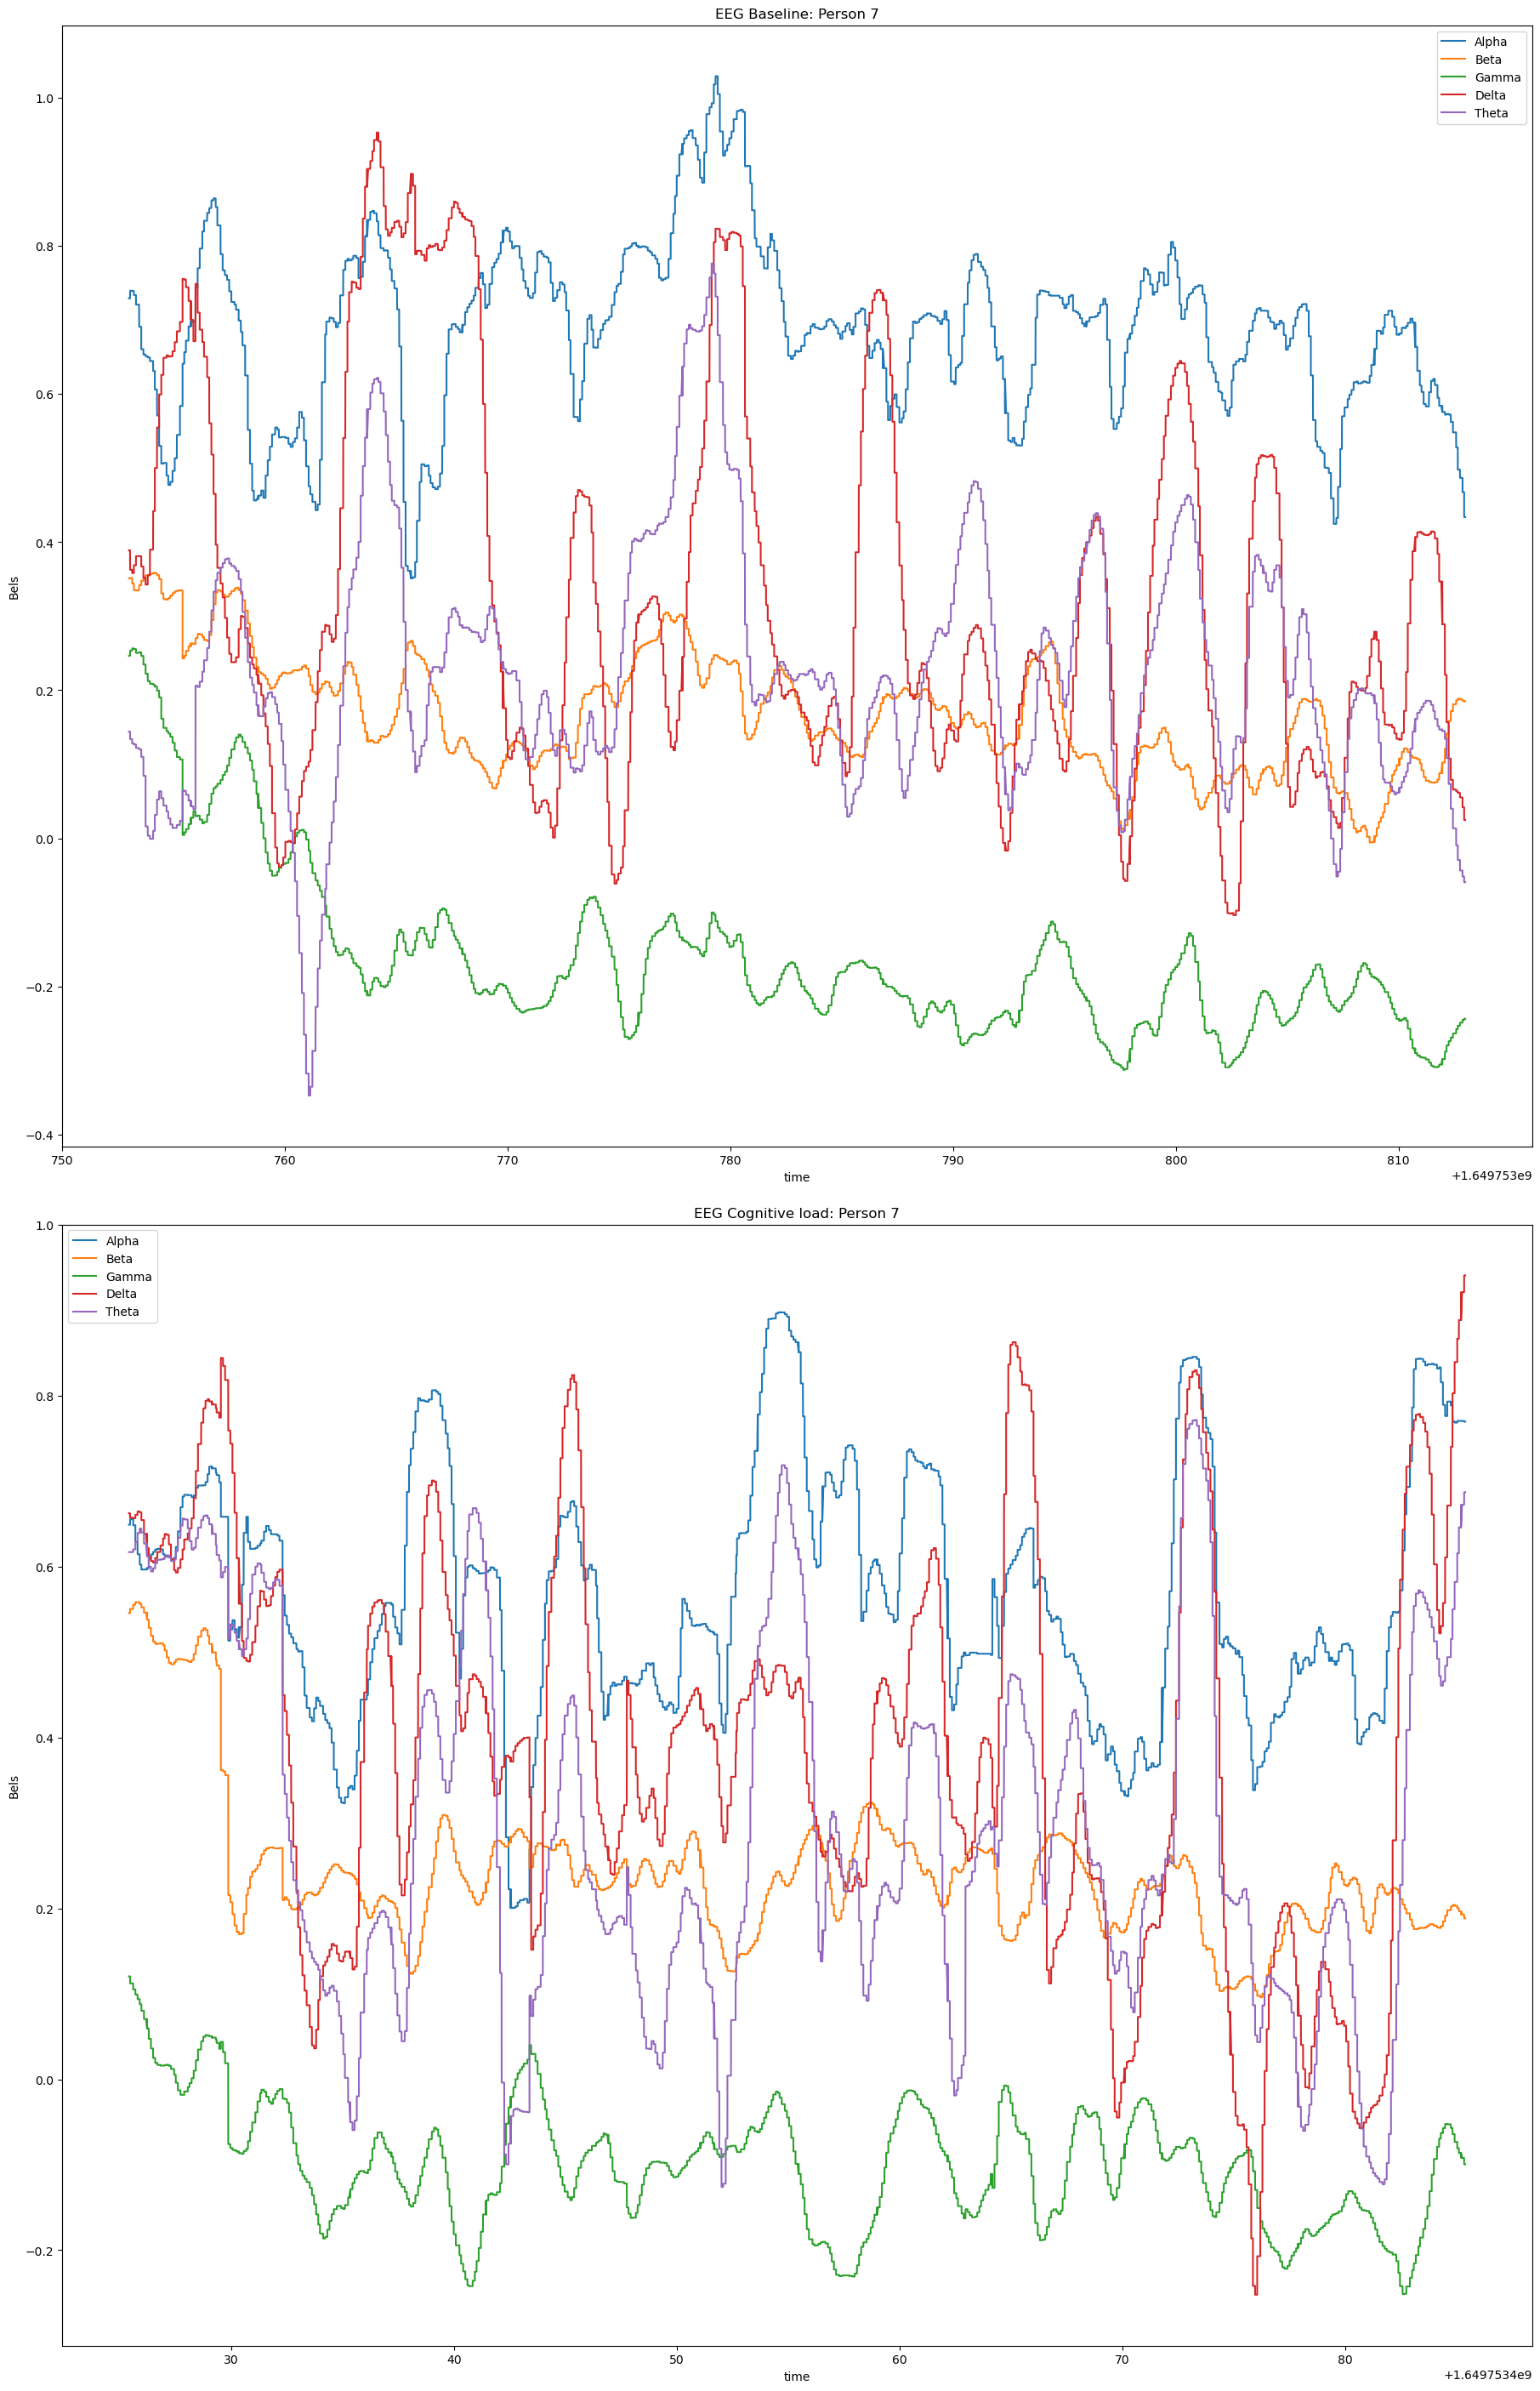

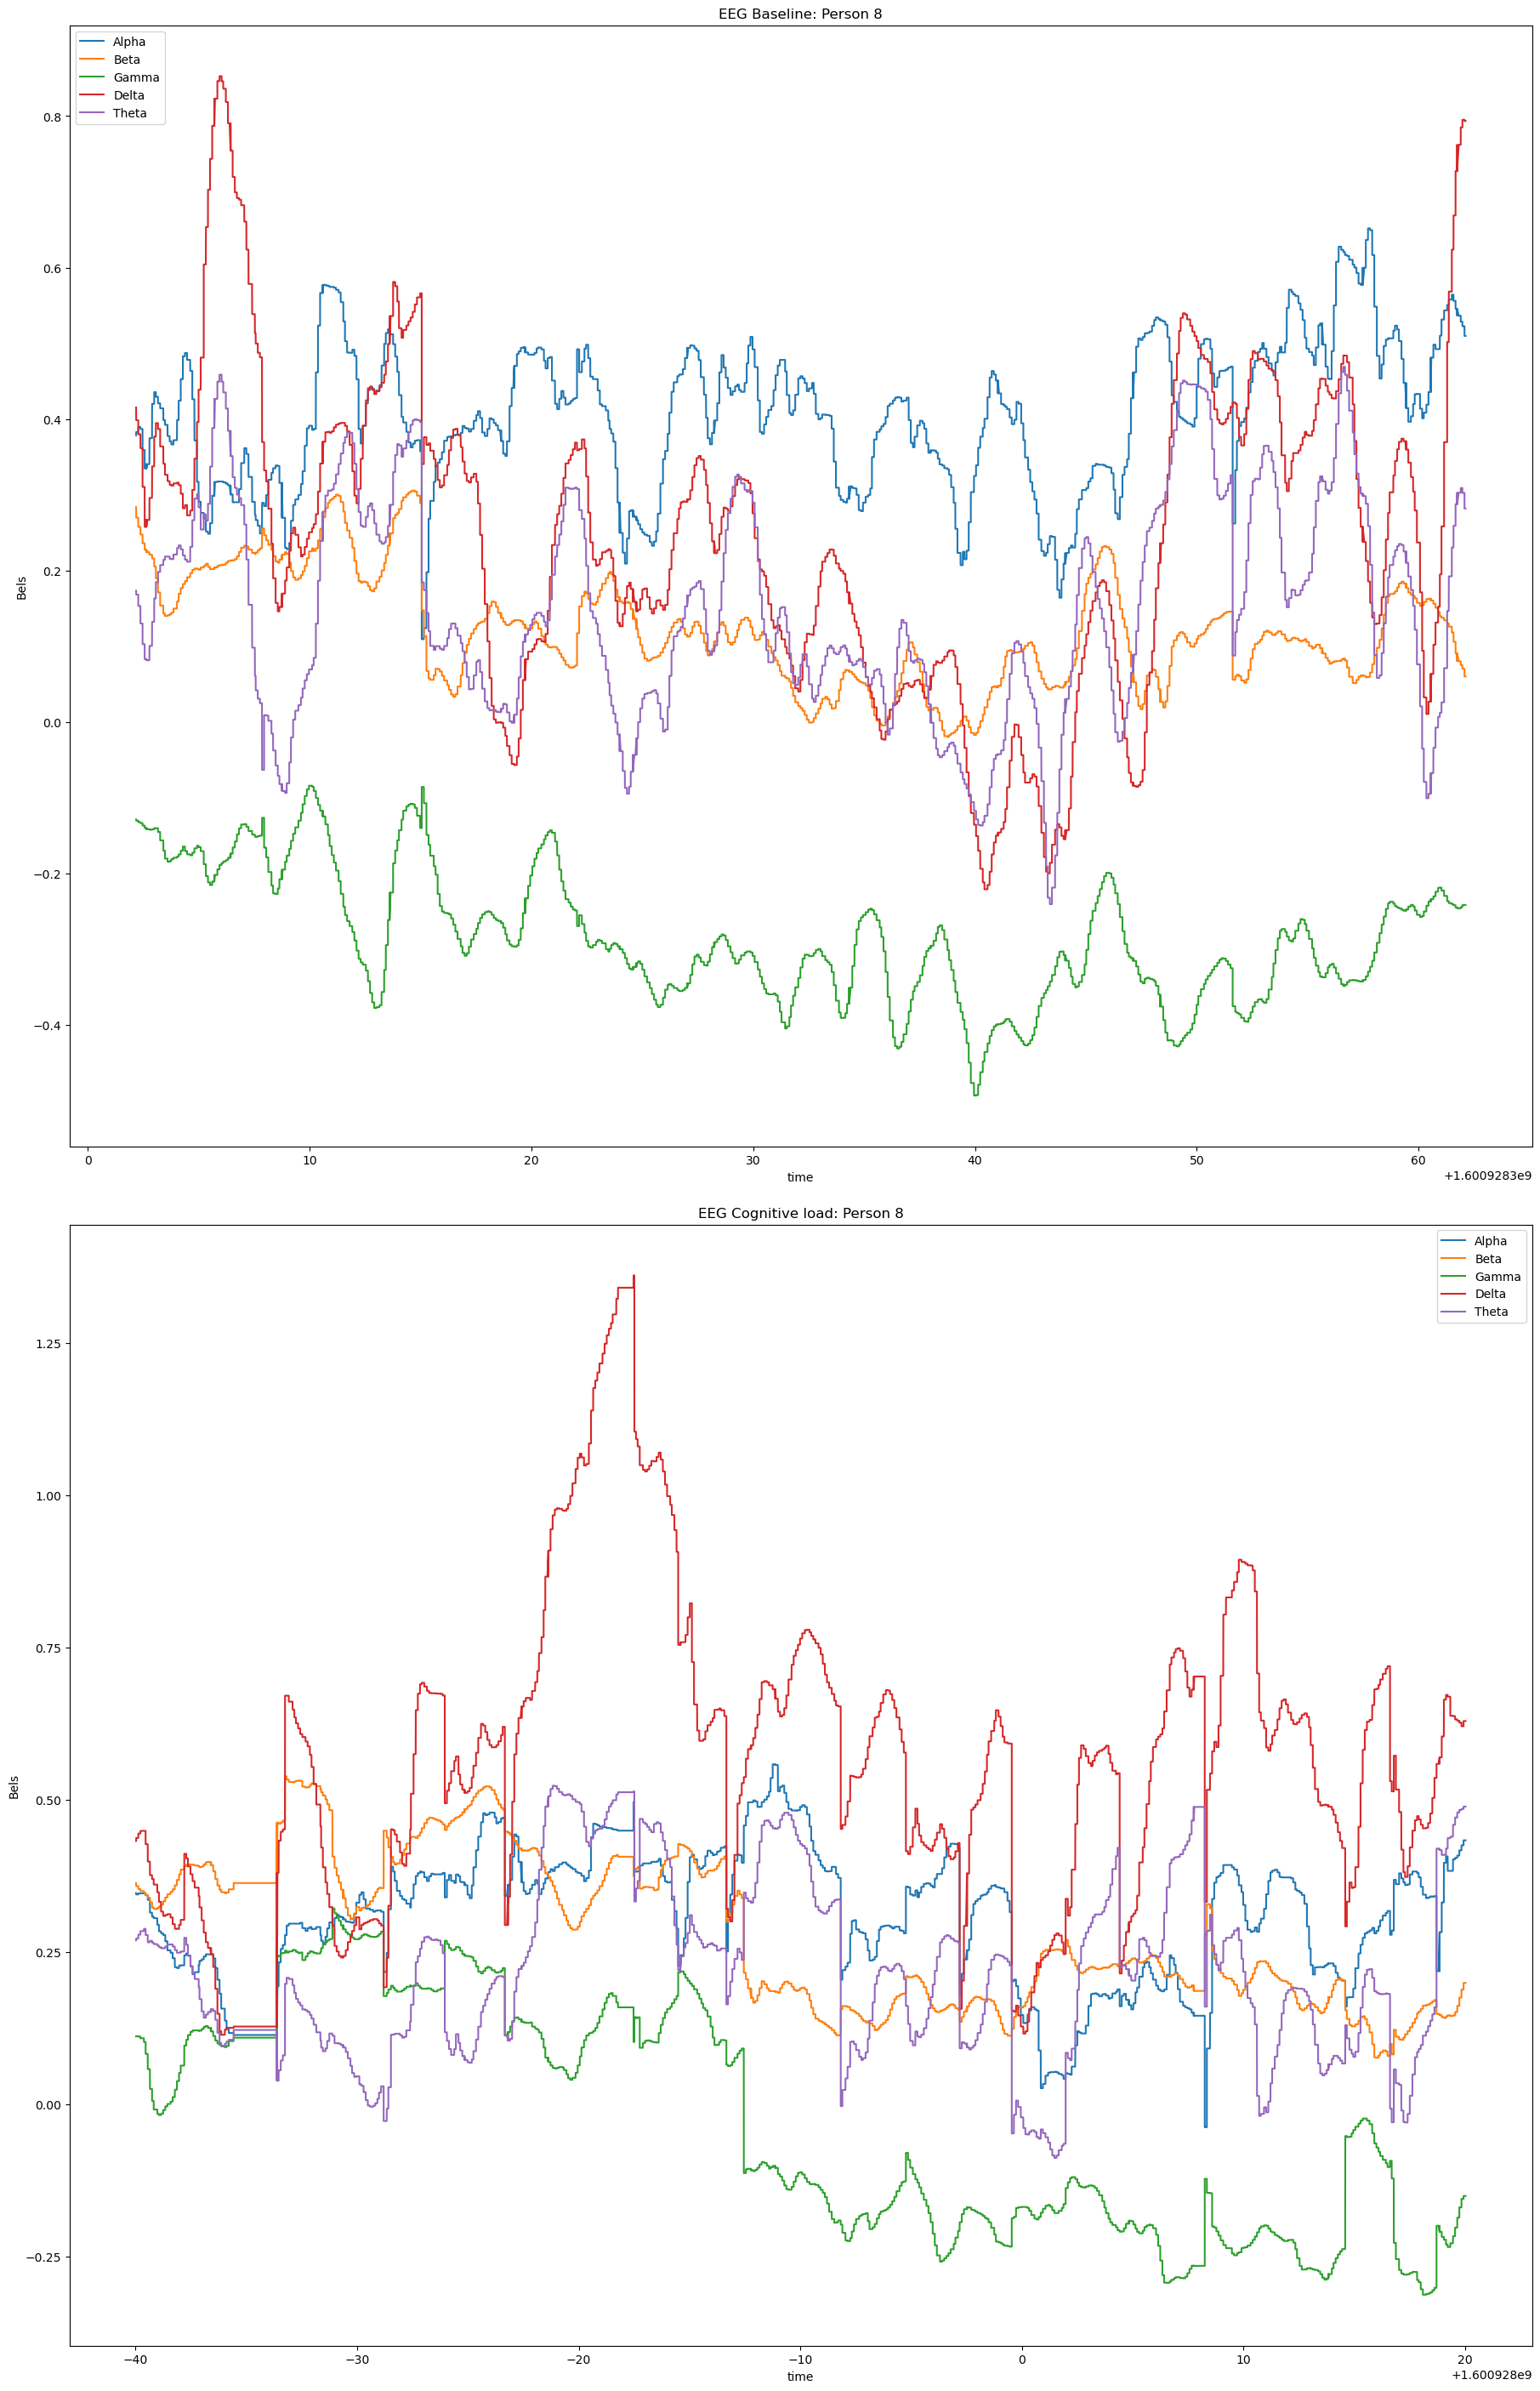

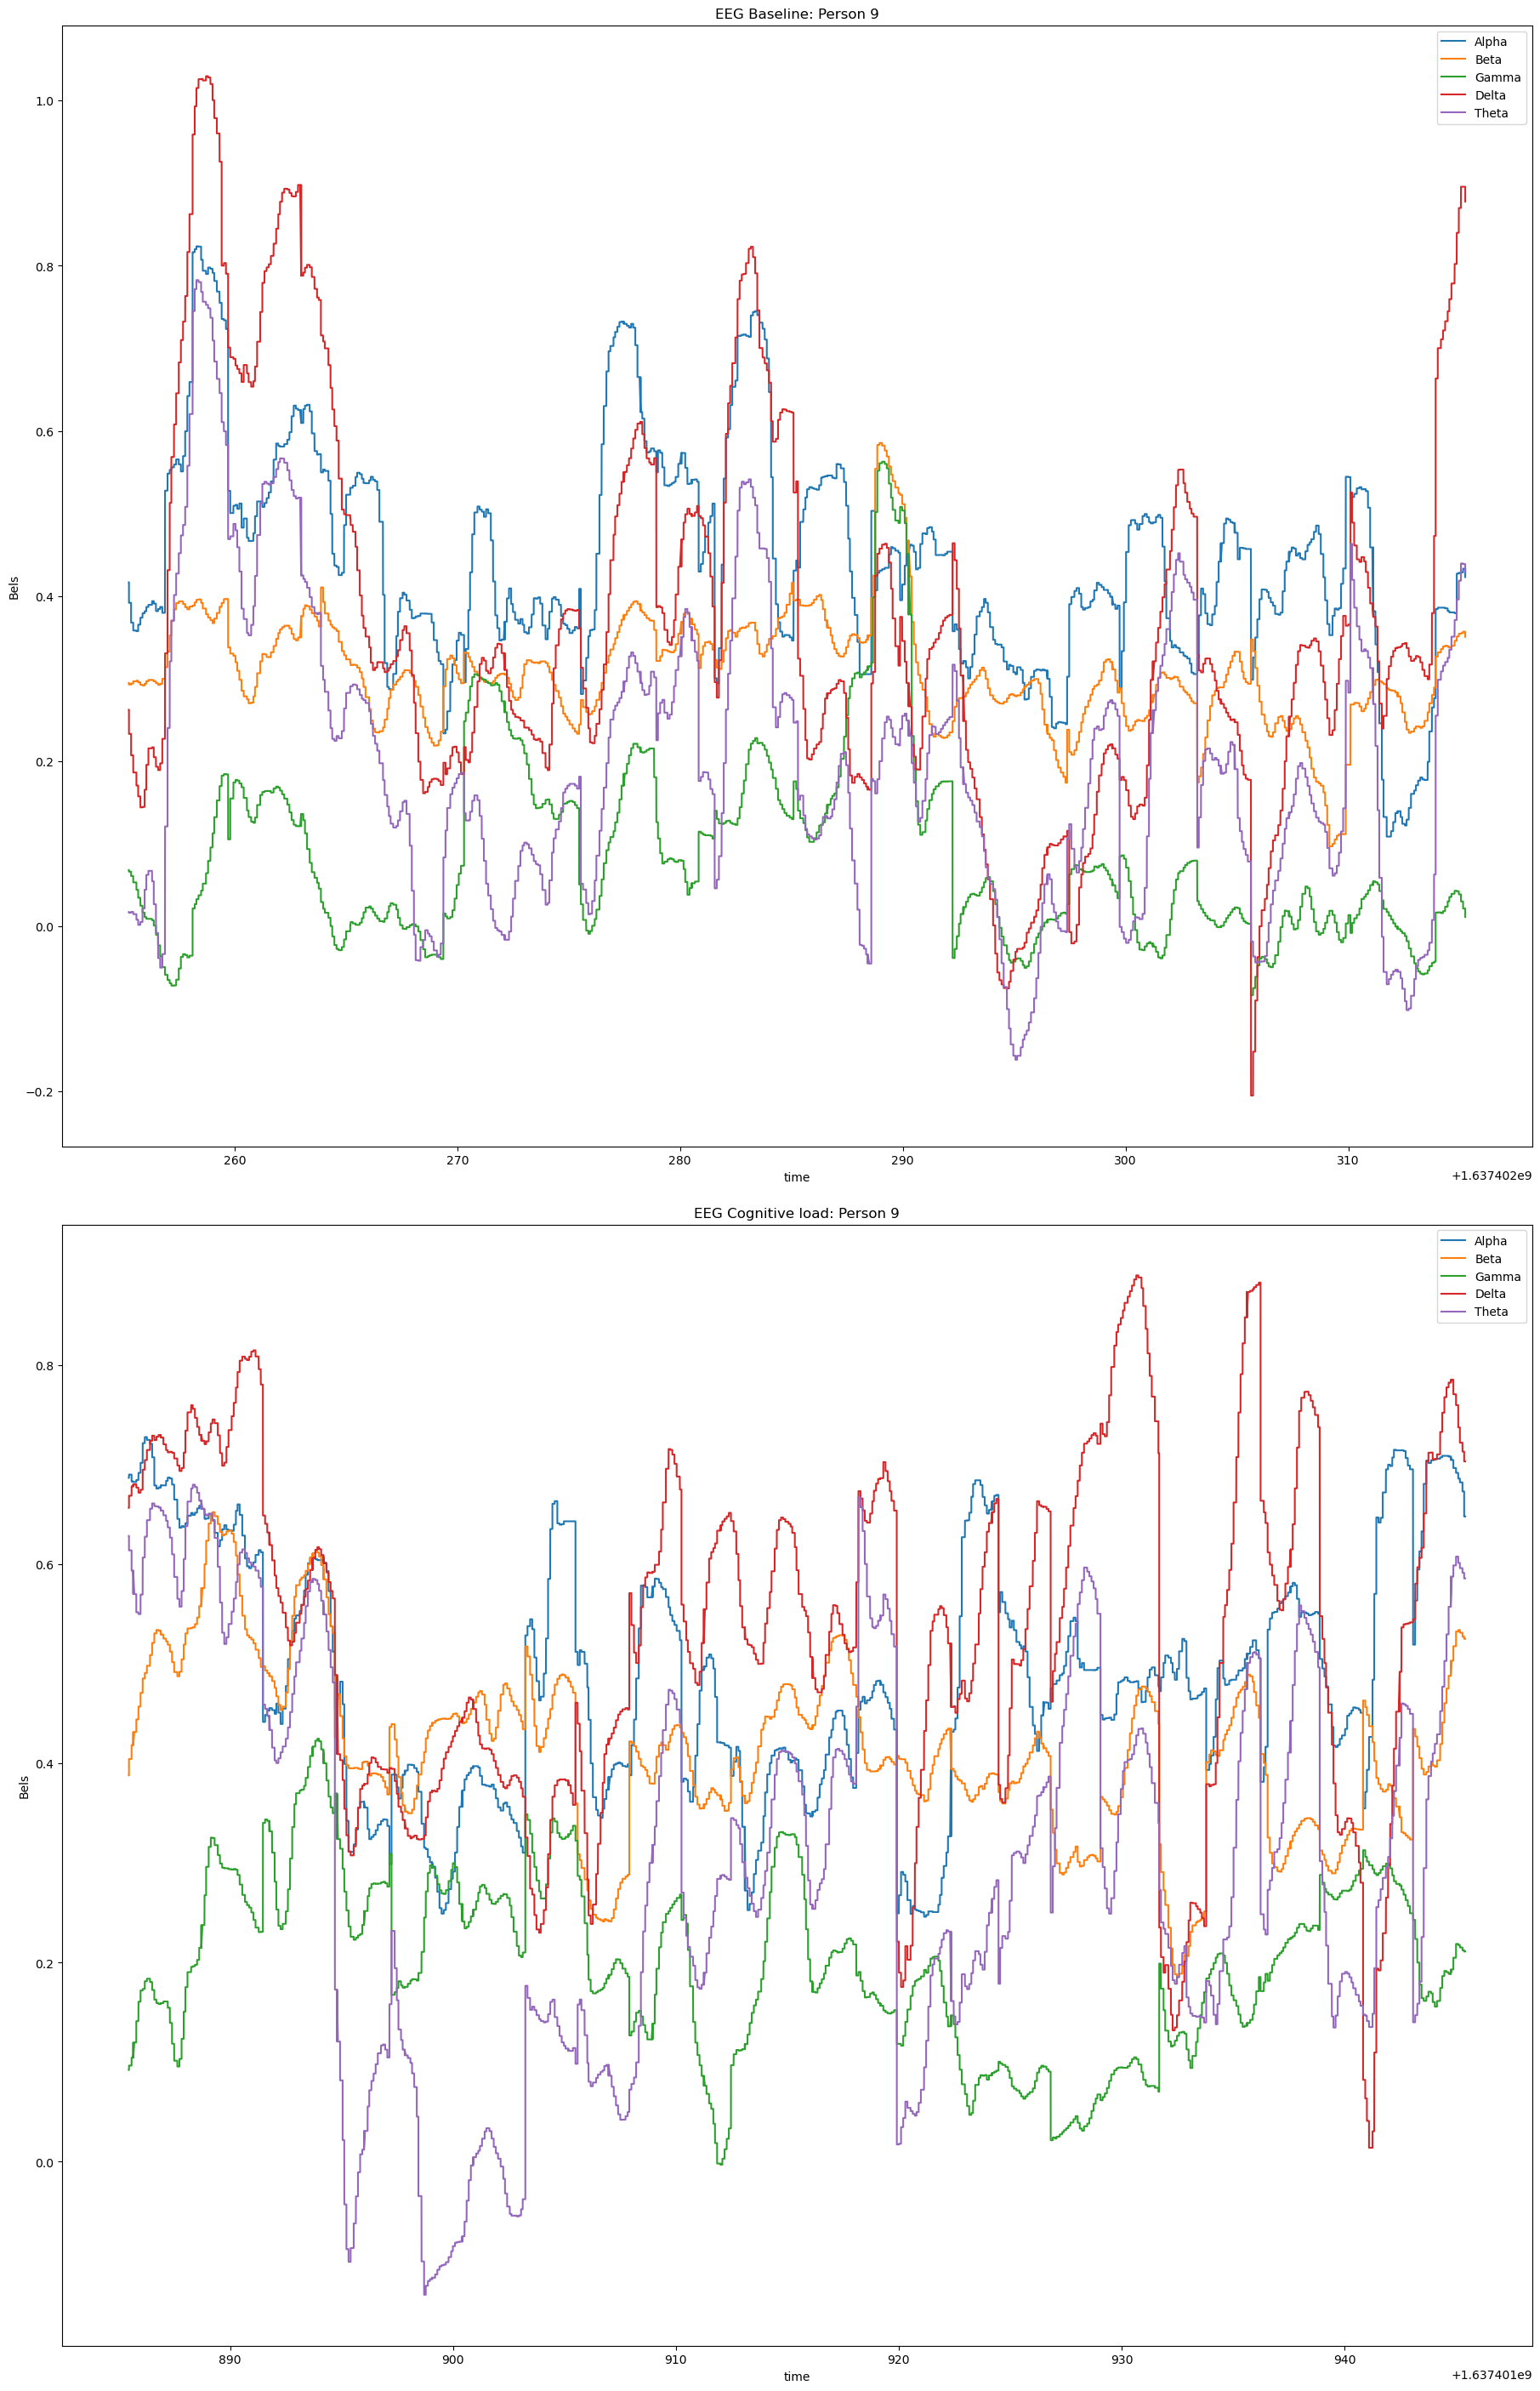

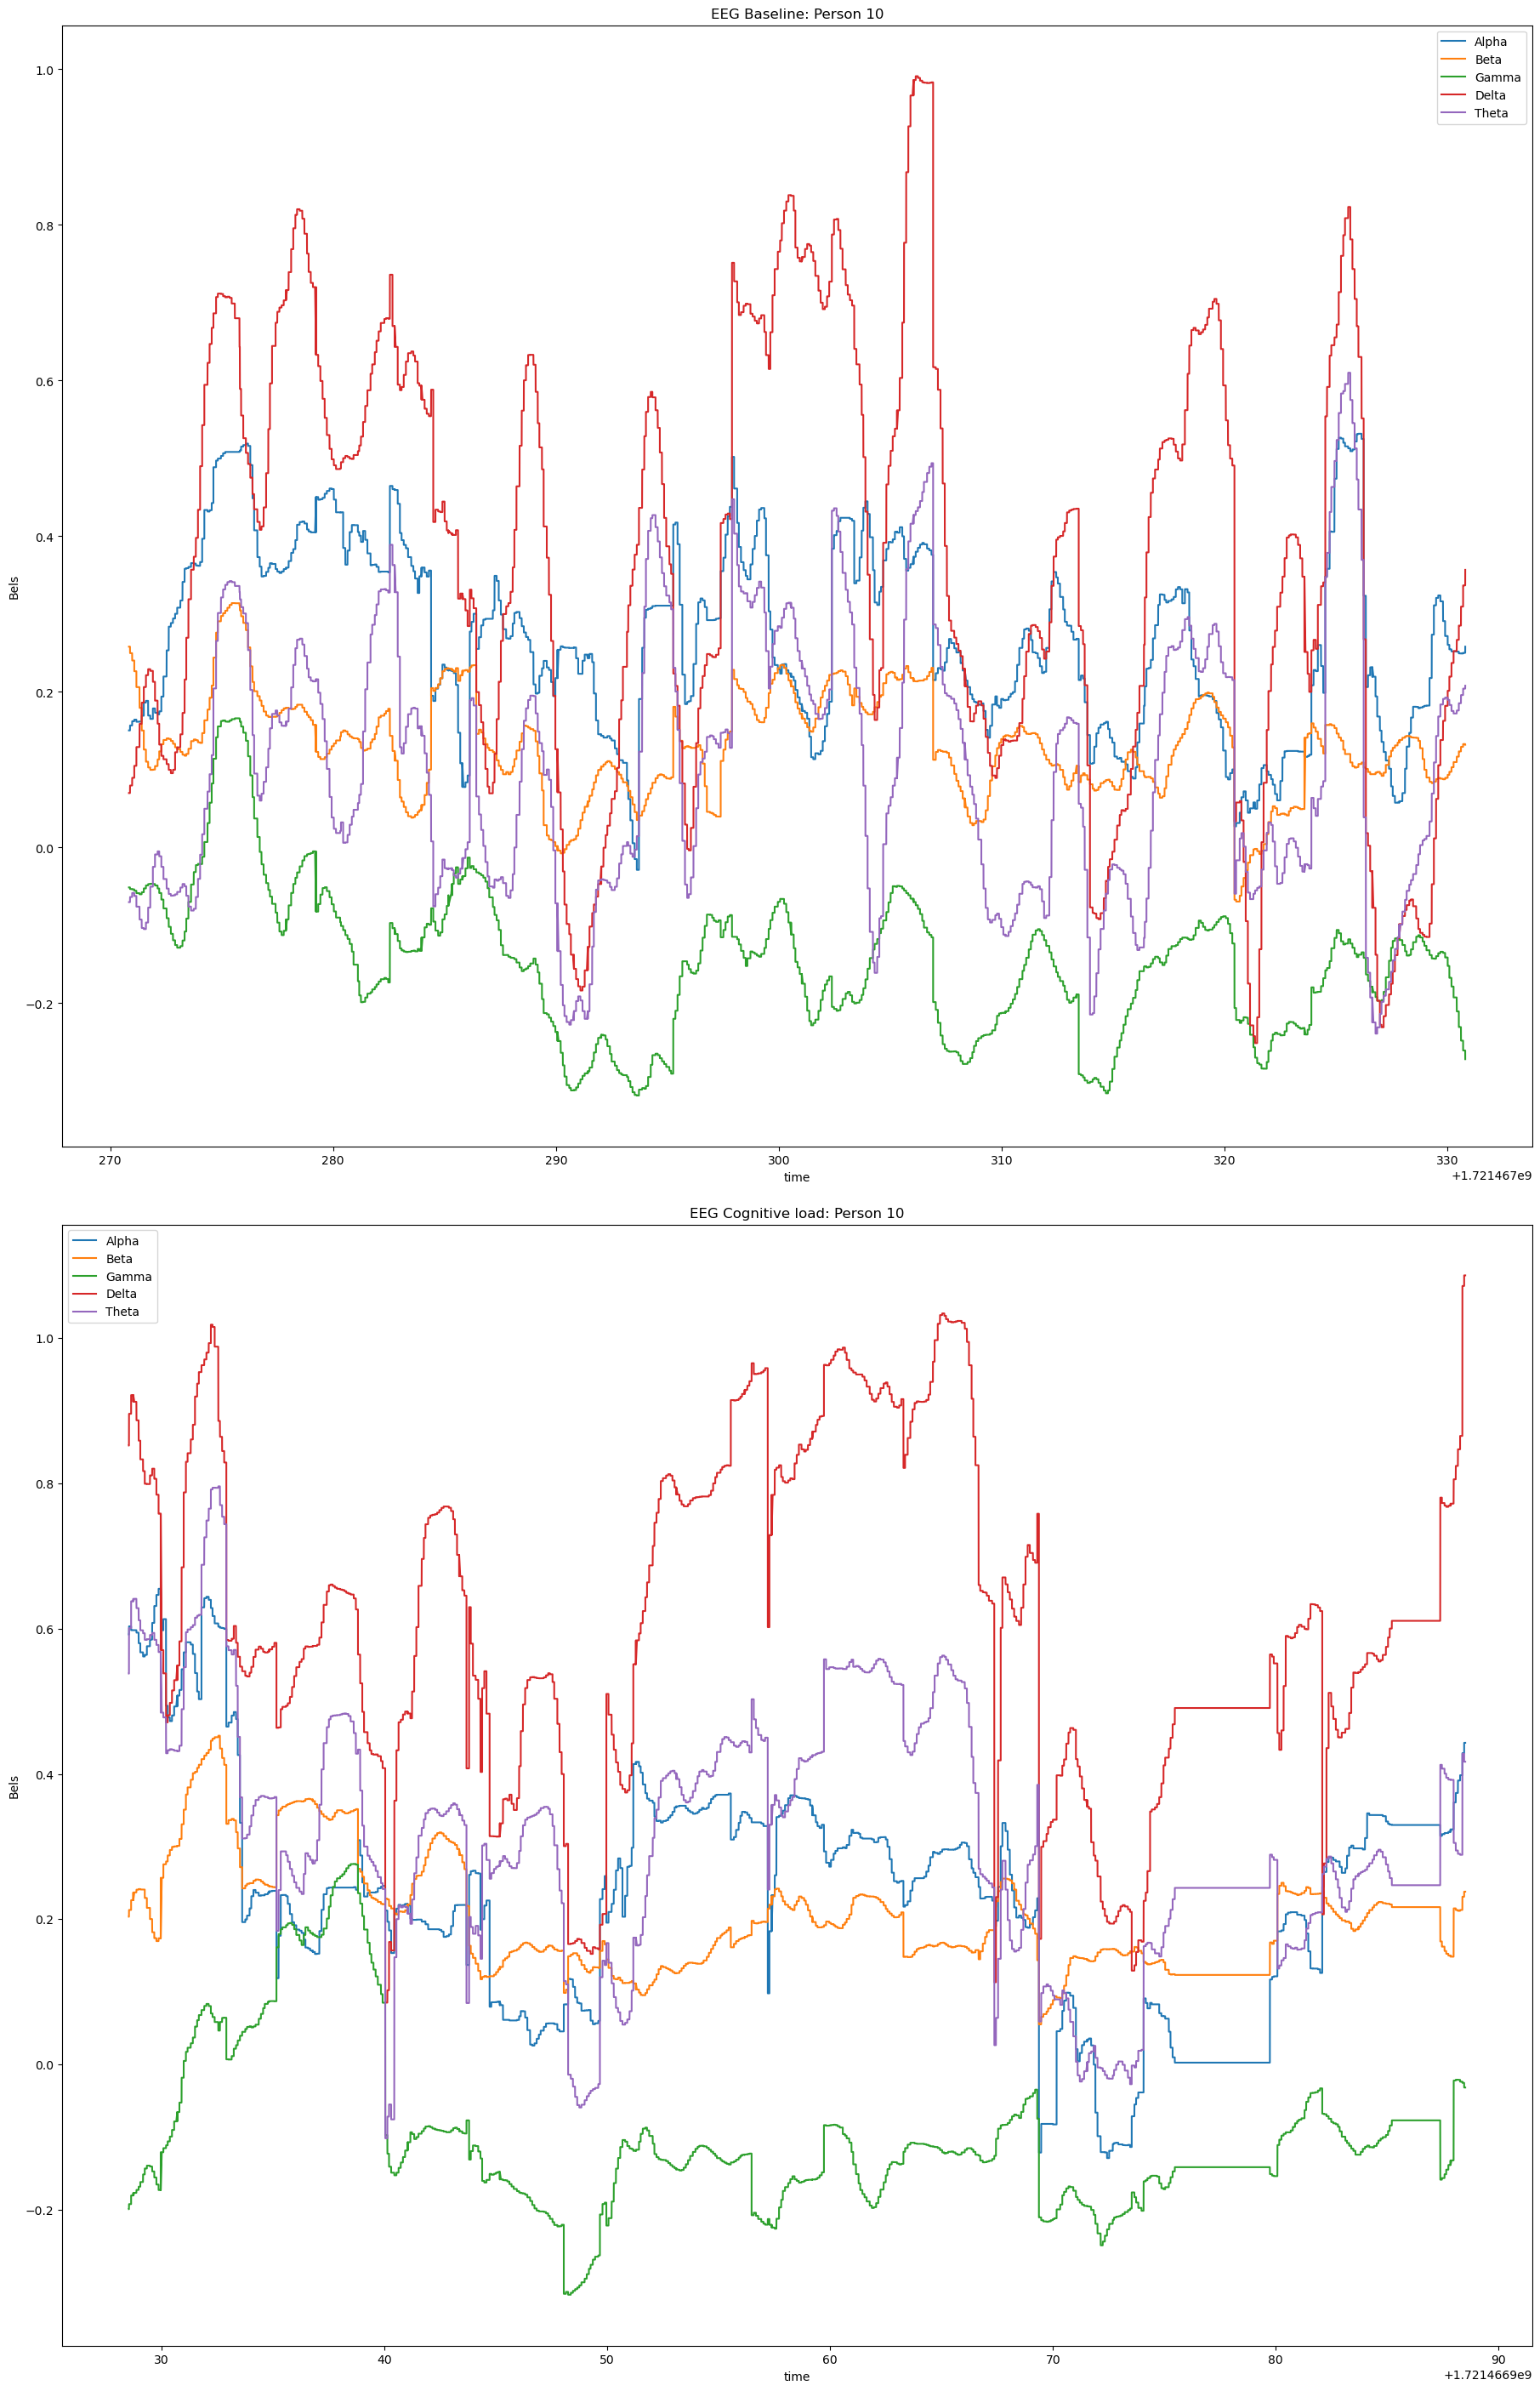

In [592]:
# calculate mean for all waves type from four Muse 2 electrodes (AF7, AF8, TP9, TP10)
def calc_waves(r):
    r['Alpha'] = (r['Alpha_TP9'] + r['Alpha_AF7'] + r['Alpha_AF8'] + r['Alpha_TP10']) / 4
    r['Beta']  = (r['Beta_TP9']  + r['Beta_AF7']  + r['Beta_AF8']  + r['Beta_TP10'])  / 4
    r['Gamma'] = (r['Gamma_TP9'] + r['Gamma_AF7'] + r['Gamma_AF8'] + r['Gamma_TP10']) / 4
    r['Delta'] = (r['Delta_TP9'] + r['Delta_AF7'] + r['Delta_AF8'] + r['Delta_TP10']) / 4
    r['Theta'] = (r['Theta_TP9'] + r['Theta_AF7'] + r['Theta_AF8'] + r['Theta_TP10']) / 4

    return r

baseline_person_ids = baseline_muse_eeg['person_id'].unique()
cognitive_person_ids = cognitive_load_muse_eeg['person_id'].unique()

# uncomment to generate specific person/s only e.g.,
# person_ids = [7,4,0]

# get common person IDs to avoid inconsistency
# uncomment/comment the following line to retrospectively generate/ not to generate plots for all persons
person_ids = baseline_person_ids & cognitive_person_ids
person_ids.sort()

for person_id in person_ids:

    # max time not to process the whole dataframe for speed optimization [60s]
    b_maxtime = baseline_muse_eeg.query(f'person_id == {person_id} and HeadBandOn == 1')['time'].min(numeric_only=True) + 60
    c_maxtime = cognitive_load_muse_eeg.query(f'person_id == {person_id} and HeadBandOn == 1')['time'].min(numeric_only=True) + 60

    # get data for one person when headband worked correctly and limit it by time
    b = baseline_muse_eeg.query(f'person_id == {person_id} and HeadBandOn == 1 and time < {b_maxtime}').sort_values(by=['time'])
    c = cognitive_load_muse_eeg.query(f'person_id == {person_id} and HeadBandOn == 1 and time < {c_maxtime}').sort_values(by=['time'])

    # get mean values for each wave type
    bx = b.apply(lambda row: calc_waves(row), axis=1)
    cx = c.apply(lambda row: calc_waves(row), axis=1)

    fig, ax = plt.subplots(2, 1, layout='constrained')

    # generate baseline plot
    ax[0].plot(bx['time'], bx['Alpha'], label='Alpha')
    ax[0].plot(bx['time'], bx['Beta'], label='Beta')
    ax[0].plot(bx['time'], bx['Gamma'], label='Gamma')
    ax[0].plot(bx['time'], bx['Delta'], label='Delta')
    ax[0].plot(bx['time'], bx['Theta'], label='Theta')
    ax[0].title.set_text(f'EEG Baseline: Person {person_id}')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('Bels')
    ax[0].legend()

    # generate cognitive load plot
    ax[1].plot(cx['time'], cx['Alpha'], label='Alpha')
    ax[1].plot(cx['time'], cx['Beta'], label='Beta')
    ax[1].plot(cx['time'], cx['Gamma'], label='Gamma')
    ax[1].plot(cx['time'], cx['Delta'], label='Delta')
    ax[1].plot(cx['time'], cx['Theta'], label='Theta')
    ax[1].title.set_text(f'EEG Cognitive load: Person {person_id}')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('Bels')
    ax[1].legend()

    # extend the plot width and height
    fig.set_figwidth(18)
    fig.set_figheight(28)

plt.show()

### Conclusion
The majority of people tested had higher beta wave activity during the cognitive load test (Stroop test).

## Comparison of mean of response times during the Stroop test when color matches or not.

In [608]:
cognitive_load_stroop_responses.columns

Index(['text', 'color', 'stroop_color_match(yes=1)', 'table_row',
       'pressed_key', 'status(correct=1,wrong=2,timeout=3)',
       'response_speed[ms]', 'person_id'],
      dtype='object')

In [609]:
cognitive_load_stroop_responses_subset = cognitive_load_stroop_responses[['stroop_color_match(yes=1)', 'response_speed[ms]']]
cognitive_load_stroop_responses_subset.head()

stroop_color_match(yes=1)  response_speed[ms]
0                          0                2000
1                          0                1601
2                          0                1396
3                          1                2000
4                          0                1793

In [727]:
response_times = cognitive_load_stroop_responses_subset.groupby(['stroop_color_match(yes=1)']).mean()
response_times

response_speed[ms]
stroop_color_match(yes=1)                    
0                                  893.493658
1                                  776.414013

<Axes: title={'center': 'Mean response times during Stroop test'}, xlabel='Stroop color matches (1=yes) or not (0=no)', ylabel='Response time in [ms]'>

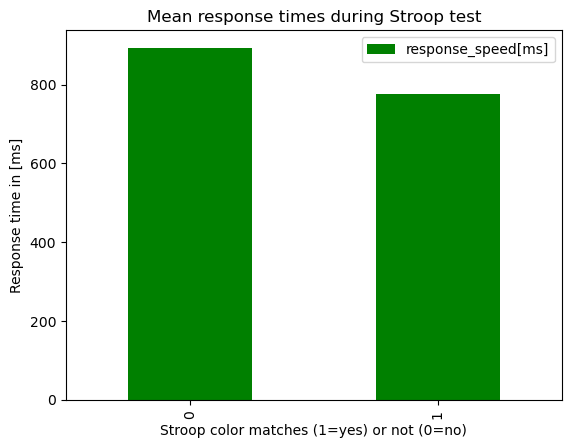

In [654]:
response_times.plot(kind="bar", color='g', xlabel='Stroop color matches (1=yes) or not (0=no)', ylabel='Response time in [ms]', title='Mean response times during Stroop test')

### Conclusion

In [731]:
a = response_times['response_speed[ms]'][0]
b = response_times['response_speed[ms]'][1]
diff = round((a/b)*100 - 100, 2)
check_diff = lambda x,y: "higher" if x > y else "lower"

In [730]:
print("In the analysed dataset, the response time was " + str(diff) + "% " + check_diff(a,b) + " when Stroop color didn't match.")

In the analysed dataset, the response time was 15.08% higher when Stroop color didn't match.


## Calculation of IBI to figure out if the heartbeat was different during rest and cognitive tests

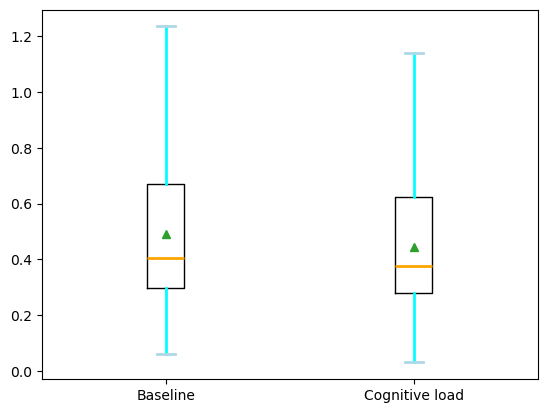

Baseline IBI mean:  0.4908681393244873
Cognitive load IBI mean:  0.4438620988042794
Cognitive load mean IBI to baseline mean IBI:  110.59023526605168


In [4]:
# renumerate the index hence it is not unique after merging multiple persons feeds
baseline_empatica_bvp.reset_index(drop=True, inplace=True)
cognitive_load_empatica_bvp.reset_index(drop=True, inplace=True)

# fetch BVP values sorted by person and time
baseline_bvp = baseline_empatica_bvp.sort_values(['person_id', 'time'])['bvp']
baseline_bvp_arr = baseline_bvp.to_numpy()
cognitive_load_bvp = cognitive_load_empatica_bvp.sort_values(['person_id', 'time'])['bvp']
cognitive_load_bvp_arr = cognitive_load_bvp.to_numpy()

# find minimas within the BVP signal to calculate IBI
# IBI calculation: https://support.empatica.com/hc/en-us/articles/360029719792-E4-data-BVP-expected-signal
baseline_bvp_mins = signal.argrelmin(baseline_bvp_arr)[0]
baseline_bvp_mins_idx = baseline_bvp.index[baseline_bvp_mins]
cognitive_load_bvp_mins = signal.argrelmin(cognitive_load_bvp_arr)[0]
cognitive_load_bvp_mins_idx = cognitive_load_bvp.index[cognitive_load_bvp_mins]

# Calculate baseline IBIs
# pick the first person_id
last_person_id = baseline_empatica_bvp['person_id'][baseline_bvp_mins_idx[0]]
last_bvp = 0
last_time = 0
baseline_ibi_list = []

for i in baseline_bvp_mins_idx:
    bvp = baseline_empatica_bvp['bvp'][i]
    time = baseline_empatica_bvp['time'][i]
    person_id = baseline_empatica_bvp['person_id'][i]

    # ensure there is no cross-person IBI calculation
    if last_bvp != 0 and person_id == last_person_id:
        # IBI = time difference between two consequent diastolic points
        ibi = time - last_time
        baseline_ibi_list.append(ibi)

    last_person_id = person_id
    last_bvp = bvp
    last_time = time

# Calculate cognitive load IBIs
last_person_id = cognitive_load_empatica_bvp['person_id'][cognitive_load_bvp_mins_idx[0]]
last_bvp = 0
last_time = 0
cognitive_load_ibi_list = []

for i in cognitive_load_bvp_mins_idx:
    bvp = cognitive_load_empatica_bvp['bvp'][i]
    time = cognitive_load_empatica_bvp['time'][i]
    person_id = cognitive_load_empatica_bvp['person_id'][i]

    # ensure there is no cross-person IBI calculation
    if last_bvp != 0 and person_id == last_person_id:
        # IBI = time difference between two consequent diastolic points
        ibi = time - last_time
        cognitive_load_ibi_list.append(ibi)

    last_person_id = person_id
    last_bvp = bvp
    last_time = time


# Create box plot
fig, ax = plt.subplots()
ax.boxplot([baseline_ibi_list, cognitive_load_ibi_list],
           showmeans=True, showfliers=False,
           medianprops={"color": "orange", "linewidth": 2},
           whiskerprops={"color": "cyan", "linewidth": 2},
           capprops={"color": "lightblue", "linewidth": 2}
           )
plt.xticks([1, 2], ['Baseline', 'Cognitive load'])
plt.show()
print("Baseline IBI mean: ", np.mean(baseline_ibi_list))
print("Cognitive load IBI mean: ", np.mean(cognitive_load_ibi_list))
print("Cognitive load mean IBI to baseline mean IBI: ", (np.mean(baseline_ibi_list) / np.mean(cognitive_load_ibi_list) * 100))

## Conclusion
Congitive load test slightly increases average heartbit rate (by ~10%).